In [1]:
library(data.table)
library(ggplot2)
library(dplyr)
#library(viridis)
library(qqman)
#library(qvalue)
#library(Bioconducter)
library(topGO)
"%!in%" <- function(x,table) match(x,table, nomatch = 0) == 0



Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


For example usage please run: vignette('qqman')

Citation appreciated but not required:
Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The fo

__make a sites file to filter out linked loci with pcangsd__

In [233]:
#how do maf and calls across ind look- also make sites files for angsd and filter sites for pcangsd
sites <- fread("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/genotypes/angsd/appc_angsd_probs.hwe.gz")
#head(sites)
unlinked <- fread("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/genotypes/angsd/ngsld/appc_unlinked_for_angsd.txt")
setnames(unlinked, 1:2, c("Chromo", "Position"))
unlinked[, filter := 1] #when ngsld has kept the site, mark with 1 so pcangsd knows to keep it
test_filter_sites <- left_join(sites, unlinked) #join with full sites dt and mark linked  sites with 0
#head(test_filter_sites)
#nrow(test_filter_sites)==nrow(sites) #check that this is true
test_filter_sites[is.na(filter), filter := 0]
#write out for pcangsd
#fwrite(test_filter_sites[,.(filter)], "/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/genotypes/angsd/ngsld/filter_linked_sites_pcangsd.txt", col.names = F)

Joining, by = c("Chromo", "Position")

__make positions file for angsd to restrict to unlinked sites__

In [ ]:
nrow(maf[, .N, by="chromo"])
pyam <- unique(maf[chromo %like% "PYAM"], by="chromo")[, chromo] #add the PYAM sites together
names <- maf[chromo %!in% pyam, .N, by="chromo"][, "chromo"] #get a list of chromosome labels
names_with_pyam <- rbind(names, matrix(nrow=1, ncol=1, "PYAM"), use.names=F)
#fwrite(names_with_pyam, "/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/ngsld/chromosomes.txt", col.names =F)

__plot the pcangsd results, color by phenotypes in the association__

In [201]:
pca <- fread("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/genotypes/angsd/output.pcangsd.cov")
#get eigenvalues
ev <-eigen(pca)
ev_dt <- data.table(ev$vectors[,1:10])
setnames(ev_dt, c("pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10"))
#variance explained?
ev$values/sum(ev$values)

[1] 0.221901770 0.005986433 0.005971992 0.005970720 0.005946961 0.005897123
  [7] 0.005888754 0.005856908 0.005849885 0.005830119 0.005822542 0.005804274
 [13] 0.005774534 0.005766451 0.005756114 0.005753626 0.005750554 0.005746207
 [19] 0.005743890 0.005737366 0.005736879 0.005735947 0.005730919 0.005724538
 [25] 0.005723702 0.005720938 0.005715563 0.005705724 0.005704918 0.005700965
 [31] 0.005694457 0.005668299 0.005663375 0.005658731 0.005648217 0.005639823
 [37] 0.005620841 0.005620312 0.005613650 0.005609061 0.005590250 0.005588762
 [43] 0.005585388 0.005568958 0.005561200 0.005530672 0.005529138 0.005513271
 [49] 0.005504987 0.005497439 0.005487145 0.005462854 0.005458941 0.005447962
 [55] 0.005432130 0.005415444 0.005397950 0.005372495 0.005364970 0.005310600
 [61] 0.005283213 0.005244973 0.005230800 0.005218218 0.005190391 0.005012499
 [67] 0.004991066 0.004978531 0.004929657 0.004911353 0.004903439 0.004878348
 [73] 0.004861031 0.004853725 0.004850291 0.004838124 0.004830776 0.004825253
 [79] 0.004819311 0.004805304 0.004788511 0.004776908 0.004770615 0.004760303
 [85] 0.004755681 0.004750463 0.004741221 0.004718760 0.004717716 0.004686732
 [91] 0.004679649 0.004633633 0.004624449 0.004611324 0.004603890 0.004583634
 [97] 0.004577706 0.004573393 0.004566898 0.004560917 0.004551655 0.004535983
[103] 0.004525968 0.004517399 0.004507834 0.004499793 0.004487312 0.004461839
[109] 0.004443602 0.004441220 0.004436501 0.004433475 0.004428614 0.004425940
[115] 0.004409216 0.004407109 0.004387074 0.004372304 0.004364221 0.004348571
[121] 0.004343991 0.004340042 0.004322838 0.004315929 0.004292349 0.004289138
[127] 0.004270876 0.004268804 0.004262863 0.004256193 0.004244851 0.004238826
[133] 0.004233425 0.004232243 0.004224253 0.004220387 0.004217491 0.004209353
[139] 0.004203756 0.004198352 0.004194363 0.004186259 0.004184298 0.004182210
[145] 0.004174825 0.004169643 0.004158900 0.004130370 0.004121254 0.004115755
[151] 0.004070559 0.004042691 0.004019740 0.003952630 0.003941130 0.003912974
[157] 0.003872655 0.003807733 0.003638070

__join together the metadata with other covariates and phenotypes with the pcs- be sure to check that the samples are ordered the same as bamlist__

In [71]:
bamlist <- fread("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/genotypes/bamlist.list.txt")
meta <- fread("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/genotypes/angsd/Sample_Meta.txt")[is.na(Group), Group :=-999][Group=="High", Group:=1][Group=="Low", Group:=0][, .(sample=gen_id, ucrit=Ucrit, sl=SL, dam, sire, case=Group, capture=Capture)]
sorted_meta <- left_join(bamlist, meta, by="sample")
#pca_phenos <- cbind(sorted_meta , ev_dt)[, sequencing_lib := ifelse(capture %in% c("Pop01","Pop02","Pop03", "Pop04", "Pop05", "Pop06", "Pop07","Pop08"), 1, 2)]
#write out the pcs to use as covariates
fwrite(sorted_meta[, "sl"], "/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/SL_pheno_test.yquant", col.names = F)

Warning message in `[.data.table`(fread("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/genotypes/angsd/Sample_Meta.txt")[is.na(Group), :
“Coerced double RHS to character to match the type of the target column (column 10 named 'Group'). If the target column's type character is correct, it's best for efficiency to avoid the coercion and create the RHS as type character. To achieve that consider R's type postfix: typeof(0L) vs typeof(0), and typeof(NA) vs typeof(NA_integer_) vs typeof(NA_real_). You can wrap the RHS with as.character() to avoid this warning, but that will still perform the coercion. If the target column's type is not correct, it's best to revisit where the DT was created and fix the column type there; e.g., by using colClasses= in fread(). Otherwise, you can change the column type now by plonking a new column (of the desired type) over the top of it; e.g. DT[, `Group`:=as.double(`Group`)]. If the RHS of := has nrow(DT) elements then the assignment is called a c

In [68]:
summary(sorted_meta)

    sample              ucrit             sl            dam           
 Length:159         Min.   :0.130   Min.   :3.920   Length:159        
 Class :character   1st Qu.:1.015   1st Qu.:4.160   Class :character  
 Mode  :character   Median :3.780   Median :4.270   Mode  :character  
                    Mean   :4.098   Mean   :4.254                     
                    3rd Qu.:6.775   3rd Qu.:4.350                     
                    Max.   :9.450   Max.   :4.560                     
                                    NA's   :12                        
     sire               case             capture         
 Length:159         Length:159         Length:159        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
                          

In [377]:
cor.test(pca_phenos$ucrit, pca_phenos$sl)


	Pearson's product-moment correlation

data:  pca_phenos$ucrit and pca_phenos$sl
t = 0.49775, df = 145, p-value = 0.6194
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1214045  0.2018443
sample estimates:
       cor 
0.04130056 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 3 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”Saving 6.67 x 6.67 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 3 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

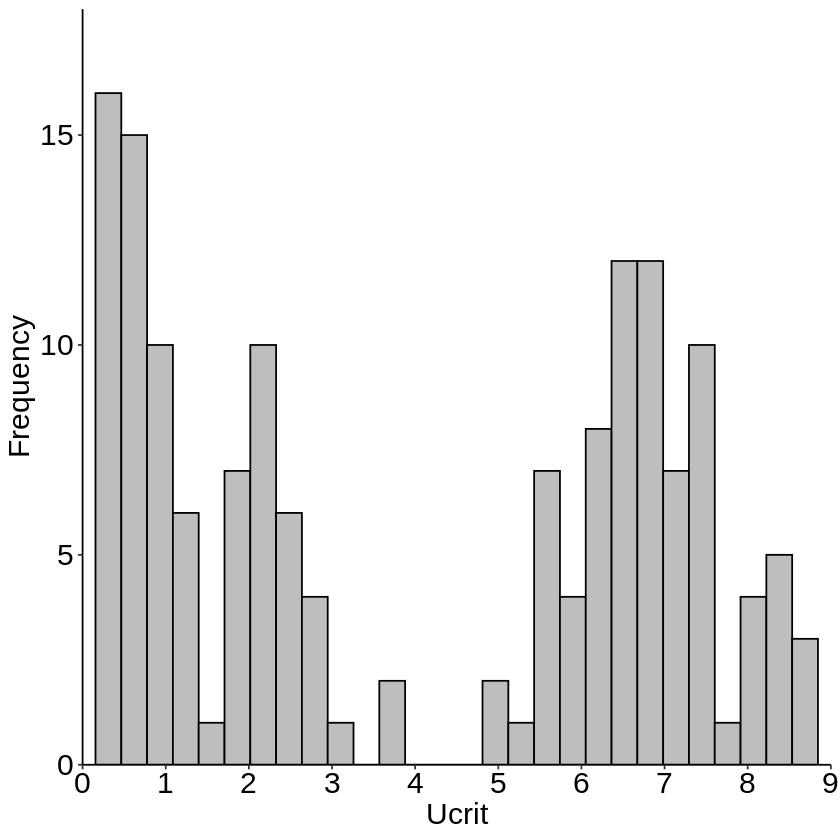

In [289]:
ucrit_fam <- ggplot()+
geom_histogram(data=pca_phenos, aes(x=ucrit), color="black", fill="gray")+
 ylab("Frequency") +
    xlab("Ucrit")+
    theme(strip.text.x = element_text(size = 14),
    legend.position = "bottom",
    legend.key=element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), 
    panel.background = element_blank(), #,
    axis.line = element_line(colour = "black"),axis.text.x =  element_text(size=18, color="black"),#15 for publication, 20 for presentation #element_text(size=15, color="black", family="Helvetica"),
    axis.title.y =  element_text(size=18, color="black"),
    axis.title.x =  element_text(size=18, color="black"),#15 for publication, 20 for presentation #element_text(size=15, color="black", family="Helvetica"),
    axis.text.y =  element_text(size=18, color="black"))+
    scale_x_continuous(limits = c(0,9), expand = c(0, 0), breaks=c(seq(0, 9, 1))) +    
    scale_y_continuous(expand = c(0,0), limits = c(0,18)) 

ucrit_fam
ggsave(plot=ucrit_fam, filename = "/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/ucrit_dist_pres.pdf")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 12 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”Saving 6.67 x 6.67 in image
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 12 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

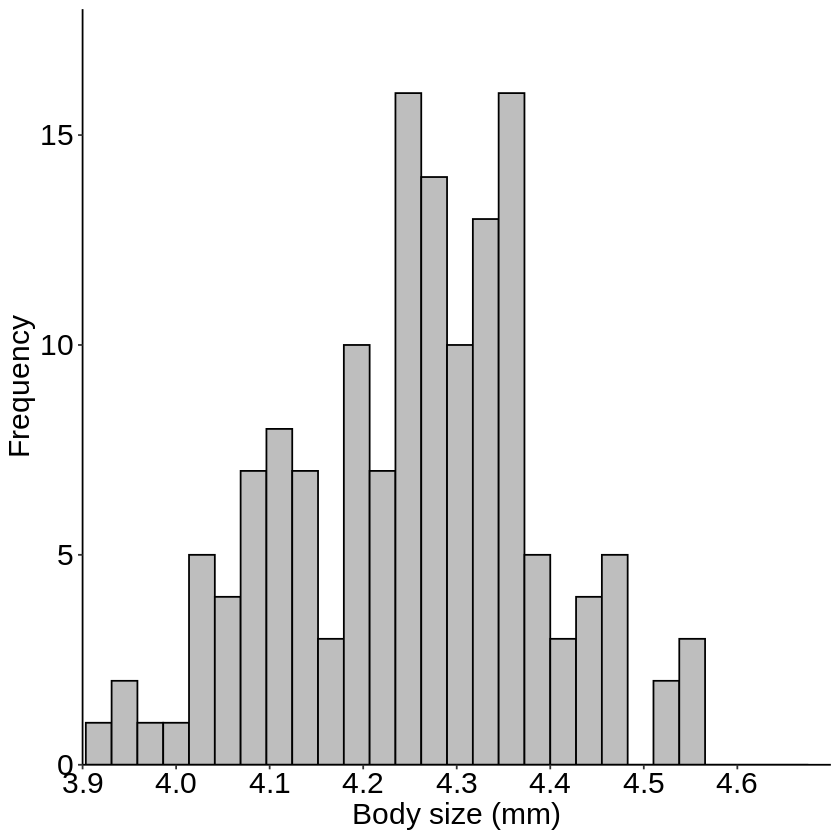

In [288]:
sl_fam <- ggplot()+
geom_histogram(data=pca_phenos, aes(x=sl), color="black", fill="gray")+
 ylab("Frequency") +
    xlab("Body size (mm)")+
    theme(strip.text.x = element_text(size = 14),
    legend.position = "bottom",
    legend.key=element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), 
    panel.background = element_blank(), #,
    axis.line = element_line(colour = "black"),axis.text.x =  element_text(size=18, color="black"),#15 for publication, 20 for presentation #element_text(size=15, color="black", family="Helvetica"),
    axis.title.y =  element_text(size=18, color="black"),
    axis.title.x =  element_text(size=18, color="black"),#15 for publication, 20 for presentation #element_text(size=15, color="black", family="Helvetica"),
    axis.text.y =  element_text(size=18, color="black"))+
    scale_x_continuous(limits = c(3.9,4.7), expand = c(0, 0), breaks=c(seq(3.9, 4.6, .1))) +    
    scale_y_continuous(expand = c(0,0), limits = c(0,18)) 

sl_fam
ggsave(plot=sl_fam, filename = "/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/sl_dist_pres.pdf")

In [269]:
summary(pca_phenos$sl)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  3.920   4.160   4.270   4.254   4.350   4.560      12 

In [240]:
predictors <- as.data.table(summary(glm(data=pca_phenos, ucrit ~ pc1+pc2+pc3))$coeff)
 
predictors$names <- row.names(summary(glm(data=pca_phenos, ucrit ~ pc1+pc2+pc3))$coeff)
setnames(predictors, 4, "pvalue")
predictors[pvalue <0.08][order(pvalue)]

Estimate,Std. Error,t value,pvalue,names
4.134696,0.2389598,17.30289,4.956978e-38,(Intercept)


In [265]:
summary(lm(data=pca_phenos, sl ~pc1+pc2+pc3))


Call:
lm(formula = sl ~ pc1 + pc2 + pc3, data = pca_phenos)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37741 -0.08883  0.02049  0.09169  0.29336 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.25853    0.01065 399.963  < 2e-16 ***
pc1         -0.49653    0.13391  -3.708 0.000298 ***
pc2         -0.12181    0.13587  -0.897 0.371479    
pc3         -0.10257    0.12827  -0.800 0.425265    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1282 on 143 degrees of freedom
  (12 observations deleted due to missingness)
Multiple R-squared:  0.09615,	Adjusted R-squared:  0.07719 
F-statistic: 5.071 on 3 and 143 DF,  p-value: 0.002291


In [261]:
#what pcs/covariates explain the phenotype?
predictors <- as.data.table(summary(glm(data=pca_phenos, sl ~pc1+pc2+pc3))$coeff)
 
predictors$names <- row.names(summary(glm(data=pca_phenos, sl ~ pc1+pc2+pc3))$coeff)
setnames(predictors, 4, "pvalue")
predictors[pvalue <0.06][order(pvalue)]

Estimate,Std. Error,t value,pvalue,names
4.2585276,0.01064732,399.962566,6.512067e-220,(Intercept)
-0.4965271,0.13391083,-3.707894,2.982073e-04,pc1


In [248]:
library(broom)

In [255]:
summary(glm(data=pca_phenos, sl ~pc1+pc2+pc3))
sl_results <- tidy(glm(data=pca_phenos, sl ~pc1+pc2+pc3))
fwrite(sl_results, "/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/sl_pca_glm.csv" )
ucrit_results <- tidy(glm(data=pca_phenos, ucrit ~pc1+pc2+pc3))
fwrite(ucrit_results, "/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/ucrit_pca_glm.csv" )



Call:
glm(formula = sl ~ pc1 + pc2 + pc3, data = pca_phenos)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.37741  -0.08883   0.02049   0.09169   0.29336  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.25853    0.01065 399.963  < 2e-16 ***
pc1         -0.49653    0.13391  -3.708 0.000298 ***
pc2         -0.12181    0.13587  -0.897 0.371479    
pc3         -0.10257    0.12827  -0.800 0.425265    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.01643846)

    Null deviance: 2.6008  on 146  degrees of freedom
Residual deviance: 2.3507  on 143  degrees of freedom
  (12 observations deleted due to missingness)
AIC: -180.78

Number of Fisher Scoring iterations: 2


In [ ]:
#fwrite(pca_phenos[,.(pc1, pc2, pc3)],"/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/genotypes/angsd/pc1-3_unlinked.cov", col.names = FALSE )

In [232]:
str(pca_phenos)

ERROR: Error in str(pca_phenos): object 'pca_phenos' not found


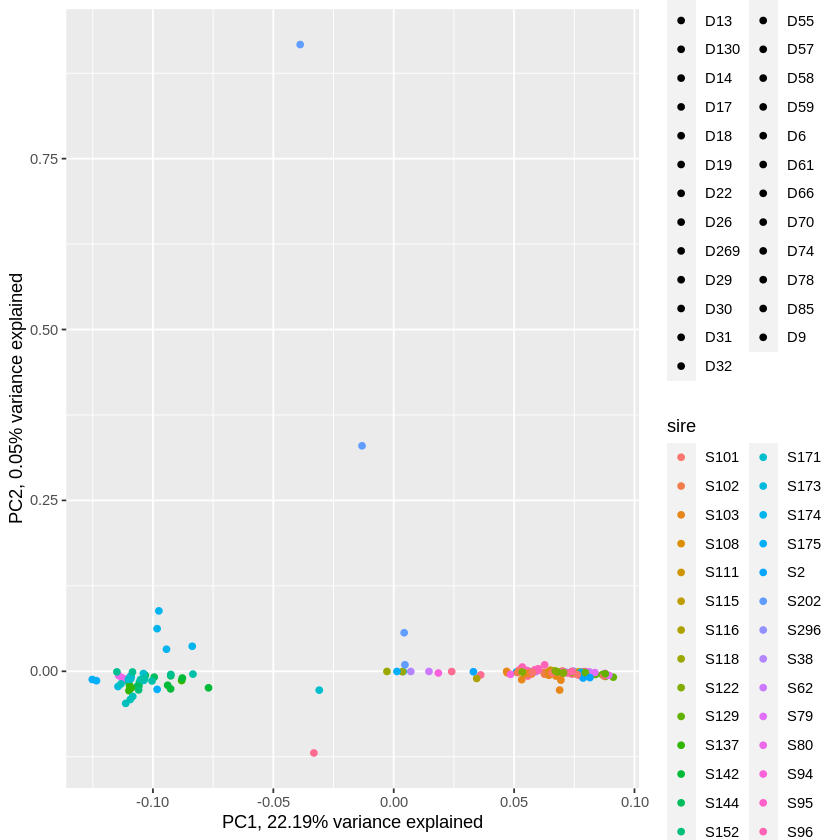

In [254]:
pca_plot <- ggplot(data=pca_phenos, aes(x=pc1, y=pc2, color=sire))+
    geom_point()+
    xlab("PC1, 22.19% variance explained")+
    ylab("PC2, 0.05% variance explained")
pca_plot

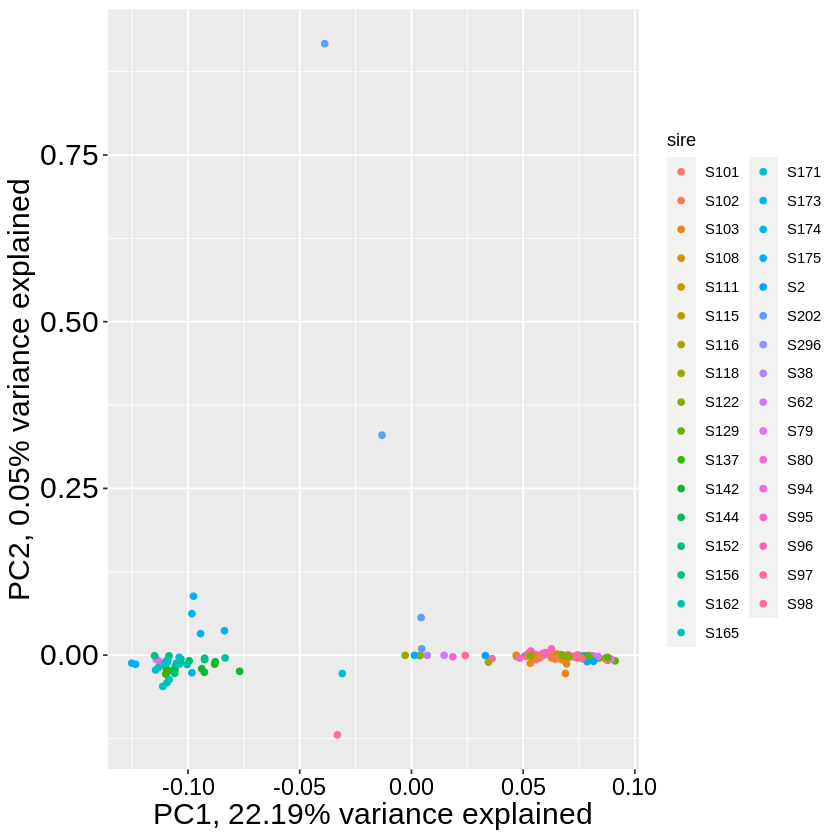

In [252]:
pca_plot <- ggplot(data=pca_phenos, aes(x=pc1, y=pc2, color=sire))+
    geom_point()+
    xlab("PC1, 22.19% variance explained")+
    ylab("PC2, 0.05% variance explained") +
    theme(strip.text.x = element_text(size = 14),
    axis.text.x =  element_text(size=14, color="black"),#15 for publication, 20 for presentation #element_text(size=15, color="black", family="Helvetica"),
    axis.title.y =  element_text(size=18, color="black"),
    axis.title.x =  element_text(size=18, color="black"),#15 for publication, 20 for presentation #element_text(size=15, color="black", family="Helvetica"),
    axis.text.y =  element_text(size=18, color="black"))
pca_plot

In [253]:
ggsave(plot=pca_plot, filename = "/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/pca_sire_color_pres.pdf")

Saving 6.67 x 6.67 in image


In [ ]:
#ggplot()+
#    geom_point(data=pca_phenos[], aes(x=pc1, y=pc2, col=sl)) +
#    scale_color_viridis(color.palette=magma)

In [ ]:
#ggplot()+
#    geom_point(data=pca_phenos, aes(x=pc1, y=pc2, col=ucrit)) +
#    scale_color_viridis(option="magma")

In [ ]:
#ggplot()+
#    geom_point(data=pca_phenos, aes(x=pc1, y=pc2, col=sequencing_lib)) +
#    scale_color_viridis(option="magma")

In [ ]:
ggplot(data=pca_phenos, aes(x=pc1, y=pc2, col=dam, label=sample))+
    geom_point() #+
    #geom_text(nudge_x = 0.02)

In [ ]:
sl_assoc5_maf0.05_noMaxdepth_unlinkedPC1cov_minQ30_minCount16.lrt0.gz

### evaluate model and plot GWAS results for each phenotype

In [210]:
lrt_ucrit <- fread("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/ucrit_assoc5_maf0.05_noMaxdepth_unlinkedPC1cov_minQ30_minCount16.lrt0.gz")
lrt_ucrit[, locus := paste(Chromosome, Position, sep=":")]
setnames(lrt_ucrit, "LRTscore", "LRT")

#filter out loci in hwe and NAN
lrt_filt_ucrit <- lrt_ucrit[LRT>0][Chromosome %in% as.character(seq(1,24,1))][, Chromosome := paste0("chr", Chromosome, sep="")] 
#format for manhattan plot
#get pvalues
lrt_filt_ucrit$pvalue<-pchisq(lrt_filt_ucrit$LRT, df=1, lower=F)
#lrt_filt_ucrit[, Chromosome := gsub("CM","", Chromosome, fixed = T)][, Chromosome := gsub("PYAM","", Chromosome, fixed = T)]#[, Chromosome := gsub(".","", Chromosome, fixed = T)]
#lrt_filt_ucrit[, Chromosome := as.numeric(Chromosome)]
lrt_filt_ucrit$SNP<-paste("r",1:length(lrt_filt_ucrit$Chromosome), sep="")


In [45]:
nrow(lrt_filt_ucrit)
#summary(lrt_filt_sl)

[1] 132106

In [46]:
lrt_sl <- fread("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/sl_assoc2_maf0.05_noMaxdepth_unlinkedPC1cov_minQ30_minCount16.lrt0.gz")
lrt_sl[, locus := paste(Chromosome, Position, sep=":")]
#for hybrid assoc 5
#setnames(lrt_sl, "LRTscore", "LRT")
#filter out loci in hwe and NAN
lrt_filt_sl <- lrt_sl[LRT>0][Chromosome %in% as.character(seq(1,24,1))][, Chromosome := paste0("chr", Chromosome, sep="")] 
#lrt_filt <- lrt[LRT>0]
#format for manhattan plot
#get pvalues
lrt_filt_sl$pvalue<-pchisq(lrt_filt_sl$LRT, df=1, lower=F)
#lrt_filt_sl[, Chromosome := gsub(".","", Chromosome, fixed = T)][, Chromosome := gsub("CM","", Chromosome, fixed = T)][, Chromosome := gsub("PYAM","", Chromosome, fixed = T)]
#lrt_filt_sl[, Chromosome := as.numeric(Chromosome)]
lrt_filt_sl$SNP<-paste("r",1:length(lrt_filt_sl$Chromosome), sep="")
nrow(lrt_filt_sl)
head(lrt_filt_sl)

[1] 105379

Chromosome,Position,Major,Minor,Frequency,N,LRT,high_WT/HE/HO,locus,pvalue,SNP
chr1,10004,A,G,0.109734,147,0.096277,42/14/0,1:10004,0.7563440,r1
chr1,32316,T,G,0.339790,147,0.843309,11/20/0,1:32316,0.3584521,r2
chr1,32326,T,C,0.206107,147,0.842760,20/11/0,1:32326,0.3586086,r3
chr1,32350,A,G,0.299364,147,0.125366,10/10/1,1:32350,0.7232860,r4
chr1,32897,C,T,0.198828,147,1.057497,13/11/0,1:32897,0.3037868,r5
chr1,33219,A,G,0.245286,147,0.272930,13/12/0,1:33219,0.6013730,r6


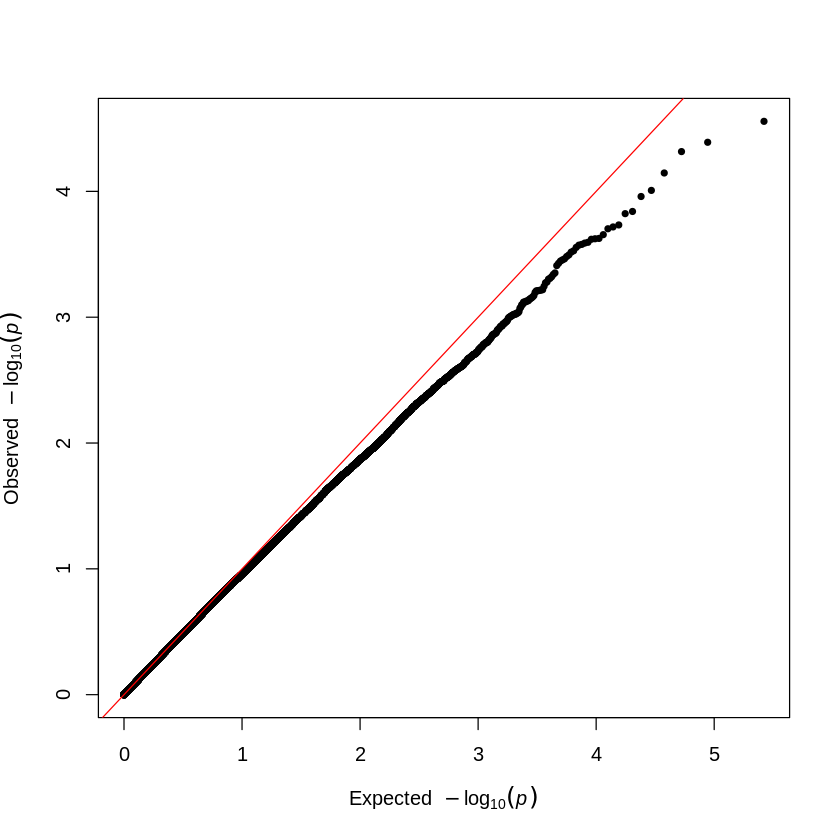

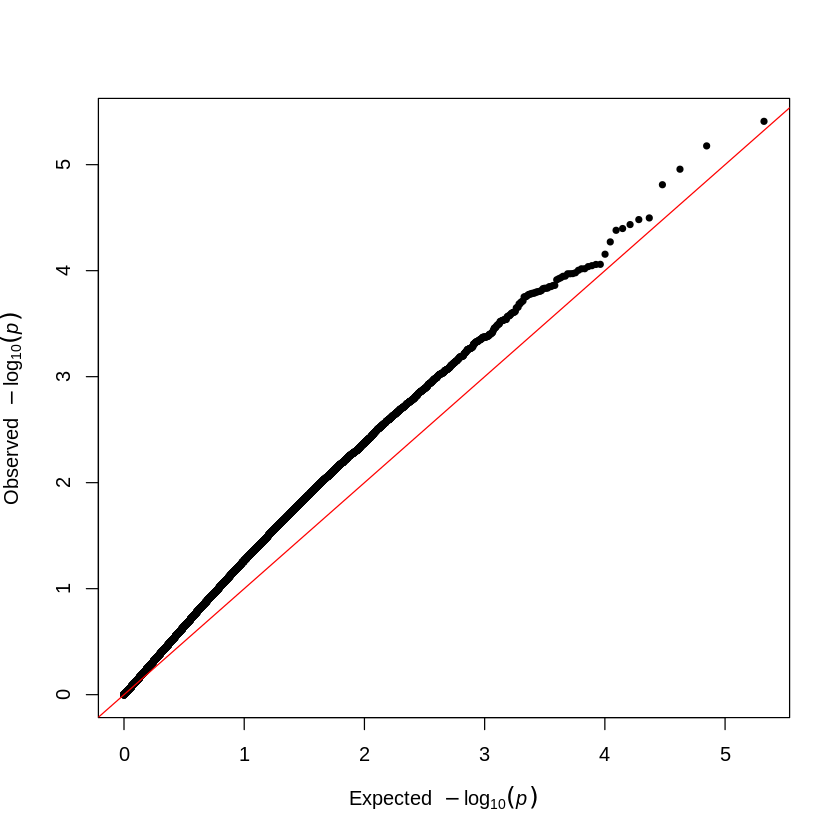

In [5]:
#png("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/pval_qq_ucrit_uniform.png")
qqman::qq(lrt_filt_ucrit$pvalue)
#dev.off()

#png("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/pval_qq_sl_uniform.png")
qqman::qq(lrt_filt_sl$pvalue)
#dev.off()


In [157]:
#compare plots and inflation 
#pdf("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/lrt_qq_ucrit.pdf")
qqplot(lrt_filt_ucrit$exp_lrt, lrt_filt_ucrit$LRT, xlab = "Expected LRT", ylab="Observed LRT")
abline(0, 1, col = "red")
#dev.off()
#median(lrt_filt_ucrit$LRT) / median(lrt_filt_ucrit$exp_lrt) #GC lambda = ratio at medians
#summary(lrt_filt_ucrit$LRT)

#pdf("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/lrt_qq_sl.pdf")
qqplot(lrt_filt_sl$exp_lrt, lrt_filt_sl$LRT, xlab = "Expected LRT", ylab="Observed LRT")
abline(0, 1, col = "red")
#dev.off()
#median(lrt_filt_sl$LRT) / median(lrt_filt_sl$exp_lrt) #GC lambda = ratio at medians
#summary(lrt_filt_sl$LRT)


png 
  2

png 
  2

In [7]:
#are the pvalues correlated for phenotypes?
for_corr_plot <- (left_join(lrt_filt_sl, lrt_filt_ucrit, by="locus"))[, .(sl_neg_log_pvalue=-log10(pvalue.x), ucrit_neg_log_pvalue=-log10(pvalue.y), locus)]



	Pearson's product-moment correlation

data:  for_corr_plot$sl_neg_log_pvalue and for_corr_plot$ucrit_neg_log_pvalue
t = -2.5668, df = 105315, p-value = 0.01027
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.013948016 -0.001869806
sample estimates:
       cor 
-0.0079092 


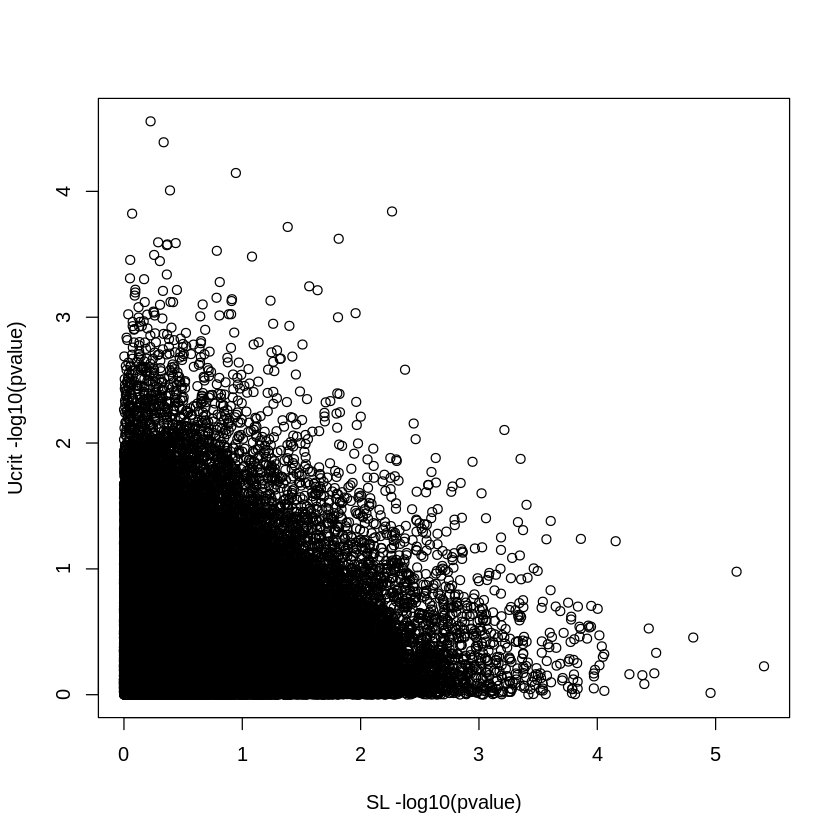

In [8]:
cor.test(for_corr_plot$sl_neg_log_pvalue, for_corr_plot$ucrit_neg_log_pvalue)
#png("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/pval_correalation.png")
plot(for_corr_plot$sl_neg_log_pvalue, for_corr_plot$ucrit_neg_log_pvalue, xlab = "SL -log10(pvalue)", ylab = "Ucrit -log10(pvalue)")
#dev.off()

__Stricter pvalue cutoff from Malin__

In [23]:
ucrit_files <- list.files(path = "/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/permute/ucrit_PC1/", pattern = glob2rx("^ucrit*.lrt0.gz"))

null_int <- as.data.frame(matrix(nrow=0, ncol=10))
setDT(null_int)
setnames(null_int, c("Chromosome", "Position", "Major", "Minor", "Frequency", "N", "LRT","high_WT/HE/HO", "pvalue", "iteration"))

for(i in 1:length(ucrit_files)){
    null <- fread(paste("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/permute/ucrit_PC1/", ucrit_files[i], sep=""))[LRT >0 & Chromosome <=24][, pvalue:=pchisq(LRT, df=1, lower=F)][, iteration := i]
    null_int <- rbind(null_int, null)
}
lrt_null_ucrit <- null_int
#ucrit_null_chrom <- null_int
#ucrit_null_chrom_lowest <- ucrit_null_chrom[, .(lower.25=quantile(min_pvalue, .025)[[1]]), by=Chromosome][,Chromosome:=paste0("chr", Chromosome, sep="")]
#ucrit_null.25 <- left_join(ucrit_null_chrom_lowest, lrt_filt_ucrit[Chromosome %like%"chr"])[pvalue <=lower.25]
#ucrit_null.25

In [189]:
#ucrit_null_lowest <- lrt_null_ucrit[, .SD[which.min(pvalue)], by=c("Chromosome", "Position")][,Chromosome:=paste0("chr", Chromosome, sep="")]
#setnames(ucrit_null_lowest, "pvalue", "null_min_pvalue")
ucrit_candidates <- left_join(ucrit_null_lowest[, .(Chromosome, Position, null_min_pvalue, iteration)], lrt_filt_ucrit[Chromosome %like%"chr"], by=c("Chromosome", "Position"))[pvalue <null_min_pvalue]
head(ucrit_candidates)
gw_ucrit <- quantile(ucrit_null_lowest$null_min_pvalue, .025)[[1]]
gw_ucrit


Chromosome,Position,null_min_pvalue,iteration,Major,Minor,Frequency,N,LRT,high_WT/HE/HO,locus,pvalue,SNP
chr1,324565,0.026090653,59,C,T,0.128064,159,9.578138,28/11/0,1:324565,0.001969080,r147
chr1,835807,0.015193917,12,C,T,0.233400,159,6.387444,12/11/0,1:835807,0.011493040,r317
chr1,2288479,0.005902176,81,T,A,0.097552,159,8.472936,64/10/0,1:2288479,0.003604692,r541
chr1,2306570,0.008506413,100,A,T,0.164756,159,7.377213,31/17/0,1:2306570,0.006605546,r547
chr1,4620883,0.028727858,49,A,G,0.296490,159,5.465957,15/14/0,1:4620883,0.019390432,r917
chr1,8597658,0.044393583,12,A,G,0.244082,159,9.803097,11/17/0,1:8597658,0.001742182,r1180


[1] 0.0004230086

In [87]:
nrow(ucrit_candidates[pvalue <gw_ucrit])
nrow(ucrit_candidates)/nrow(lrt_filt_ucrit)


[1] 20

[1] 0.005987616

In [33]:
sl_files <- list.files(path = "/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/permute/assoc2/", pattern = glob2rx("^sl*.lrt0.gz"))

null_int <- as.data.frame(matrix(nrow=0, ncol=10))
setDT(null_int)
setnames(null_int, c("Chromosome", "Position", "Major", "Minor", "Frequency", "N", "LRT","high_WT/HE/HO", "pvalue", "iteration"))
for(i in 1:length(sl_files)){
    null <- fread(paste("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/permute/assoc2/", sl_files[i], sep=""))[LRT >0 & Chromosome <=24][, pvalue:=pchisq(LRT, df=1, lower.tail = F)][, iteration := i]
    null_int <- rbind(null_int, null)
}
lrt_null_sl <- null_int
#sl_null_chrom_lowest <- sl_null_chrom[, .(lower.25=quantile(min_pvalue, .025)[[1]]), by=Chromosome][,Chromosome:=paste0("chr", Chromosome, sep="")]
#sl_null.25 <- left_join(sl_null_chrom_lowest, lrt_filt_sl[Chromosome %like%"chr"])[pvalue <=lower.25]
#sl_null.25

In [183]:
#sl_null_lowest <- lrt_null_sl[, .SD[which.min(pvalue)], by=c("Chromosome", "Position")][,Chromosome:=paste0("chr", Chromosome, sep="")]
#setnames(sl_null_lowest, "pvalue", "null_min_pvalue")
sl_candidates <- left_join(sl_null_lowest[, .(Chromosome, Position, null_min_pvalue, iteration)], lrt_filt_sl[Chromosome %like%"chr"], by=c("Chromosome", "Position"))[pvalue <null_min_pvalue]
head(sl_candidates)
gw_sl <- quantile(sl_null_lowest$null_min_pvalue, .025)[[1]]
gw_sl


Chromosome,Position,null_min_pvalue,iteration,Major,Minor,Frequency,N,LRT,high_WT/HE/HO,locus,pvalue,SNP,Chromosome_man
chr1,245984,0.00938431,76,A,G,0.127738,147,8.548223,39/13/0,1:245984,0.0034585969,r80,1
chr1,1682728,0.01276419,79,G,A,0.071366,147,11.184628,81/11/0,1:1682728,0.0008247779,r322,1
chr1,2189668,0.01387337,17,T,C,0.111777,147,6.686052,37/14/0,1:2189668,0.0097170162,r367,1
chr1,2783350,0.05088705,22,G,C,0.160613,147,4.532921,32/13/0,1:2783350,0.0332488203,r420,1
chr1,3590981,0.02337151,79,A,G,0.197206,147,8.934719,22/16/0,1:3590981,0.0027980051,r565,1
chr1,4087403,0.01238810,69,T,A,0.289917,147,7.188785,14/13/1,1:4087403,0.0073360638,r626,1


[1] 0.0004238663

In [187]:
gw_ucrit
gw_sl

[1] 0.0004230086

[1] 0.0004238663

In [80]:
nrow(sl_candidates)

[1] 1663

In [84]:
nrow(sl_candidates[pvalue <gw_sl])

[1] 75

In [78]:
nrow(sl_candidates)/nrow(lrt_filt_sl)


[1] 0.01578113

In [ ]:
#text("Vertical Line", x = v, y = max(y), srt = -90, pos = 4) # near top

__given the power analysis results, do these candidates make sense? If not, no use in the enrichment__

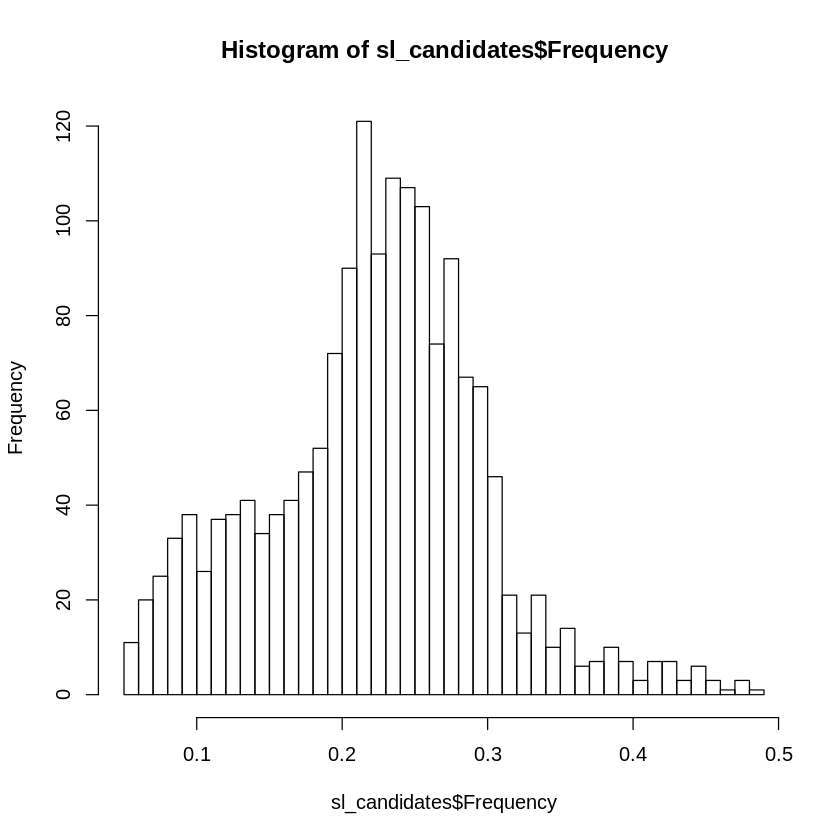

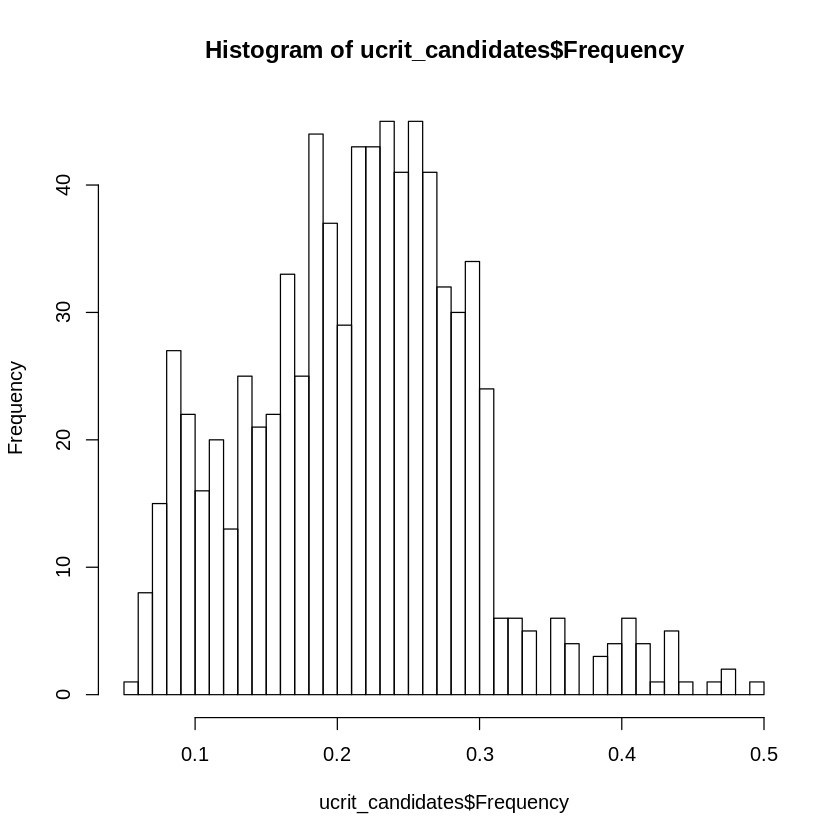

In [131]:
hist(sl_candidates$Frequency, breaks = 40)
hist(ucrit_candidates$Frequency, breaks = 40)

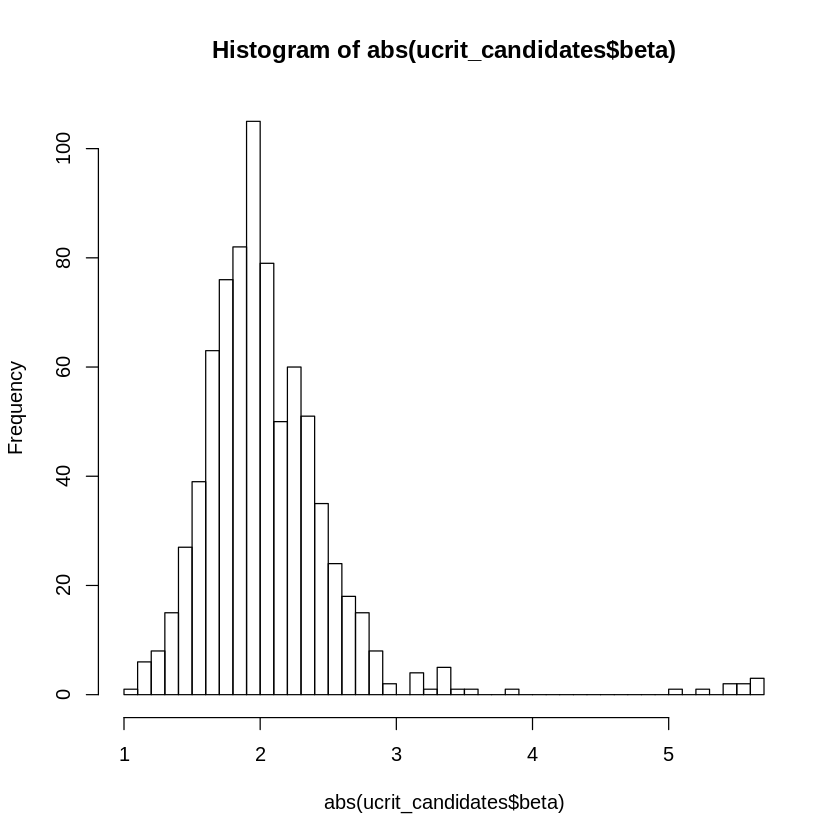

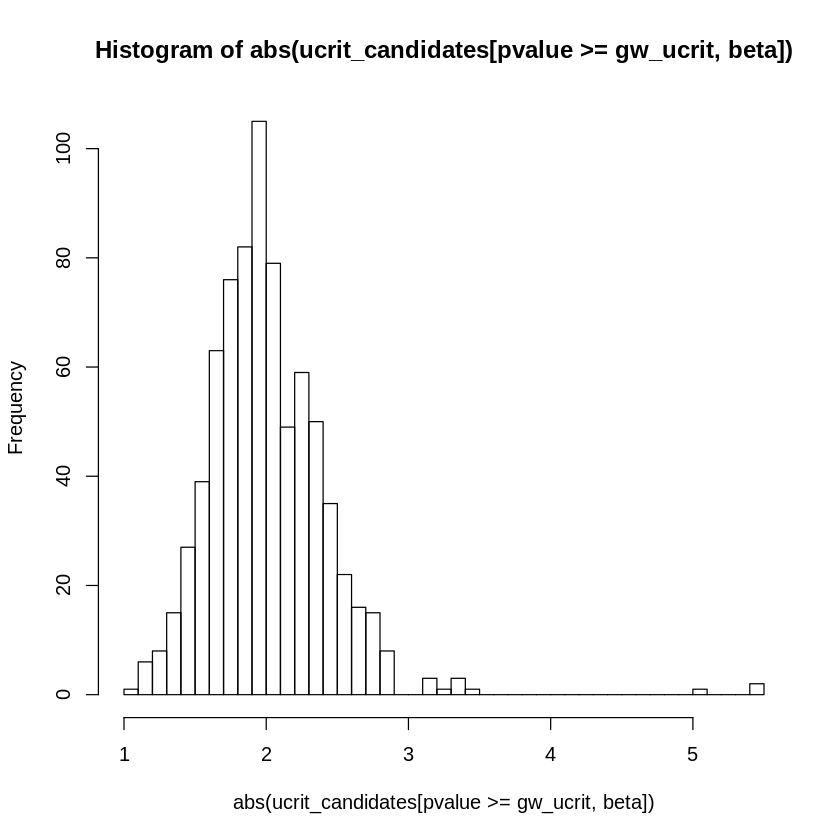

In [135]:
#hist(sl_candidates$Frequency, breaks = 40)
hist(abs(ucrit_candidates$beta), breaks = 40)
hist(abs(ucrit_candidates[pvalue >=gw_ucrit, beta]), breaks = 40)

In [139]:
ucrit_candidates_power.9 <- ucrit_candidates[Frequency >= 0.05 &beta >=1.52 |Frequency >= 0.1 &beta >=1.1 | Frequency >= 0.5 &beta >=0.66]
nrow(ucrit_candidates_power.9)
nrow(ucrit_candidates)

[1] 153

[1] 791

__try using the permutations as the expected for the qq plot__

In [38]:
#lrt_sl_null <- lrt_sl_null[LRT > 0][order(LRT)][,quantile:=1:nrow(lrt_sl_null[LRT > 0])/nrow(lrt_sl_null[LRT > 0])] #quantiles for observed lrt
#lrt_sl_null_filt <- lrt_sl_null[LRT >0][Chromosome %in% as.character(seq(1,24,1))][, pvalue:=pchisq(LRT, df=1, lower=F)]
png("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/lrt_null_qq_sl.png")

qqplot(-log10(lrt_null_sl$pvalue), -log10(lrt_filt_sl$pvalue), xlab = "Expected -log10(p)", ylab="Observed -log10(p)")
abline(0, 1, col = "red")
dev.off()

png 
  2

In [40]:
#lrt_ucrit_null <- lrt_ucrit_null[LRT > 0][order(LRT)][,quantile:=1:nrow(lrt_ucrit_null[LRT > 0])/nrow(lrt_ucrit_null[LRT > 0])] #quantiles for observed lrt
#lrt_ucrit_null_filt <- lrt_ucrit_null[LRT >0][Chromosome %in% as.character(seq(1,24,1))][, pvalue:=pchisq(LRT, df=1, lower=F)]
png("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/lrt_null_qq_ucrit.png")
qqplot(-log10(lrt_null_ucrit$pvalue), -log10(lrt_filt_ucrit$pvalue), xlab = "Expected -log10(p)", ylab="Observed -log10(p)")
abline(0, 1, col = "red")
dev.off()

png 
  2

In [47]:
head(lrt_filt_ucrit)

Chromosome,Position,Major,Minor,Frequency,N,LRT,high_WT/HE/HO,locus,pvalue,SNP
chr1,10004,A,G,0.109734,159,6.232637,48/15/0,1:10004,0.01254168,r1
chr1,32316,T,G,0.339790,159,1.473608,12/24/0,1:32316,0.22477729,r2
chr1,32326,T,C,0.206107,159,1.906875,23/15/0,1:32326,0.16731080,r3
chr1,32350,A,G,0.299364,159,0.454150,13/11/2,1:32350,0.50037075,r4
chr1,32897,C,T,0.198828,159,1.300784,15/12/0,1:32897,0.25407007,r5
chr1,33219,A,G,0.245286,159,0.585322,14/12/0,1:33219,0.44423380,r6


In [48]:
#only for manhattan plot
lrt_filt_ucrit[,Chromosome_man := gsub("chr", "", Chromosome)][, Chromosome_man:=as.numeric(Chromosome_man)]
lrt_filt_sl[,Chromosome_man := gsub("chr", "", Chromosome)][, Chromosome_man:=as.numeric(Chromosome_man)]


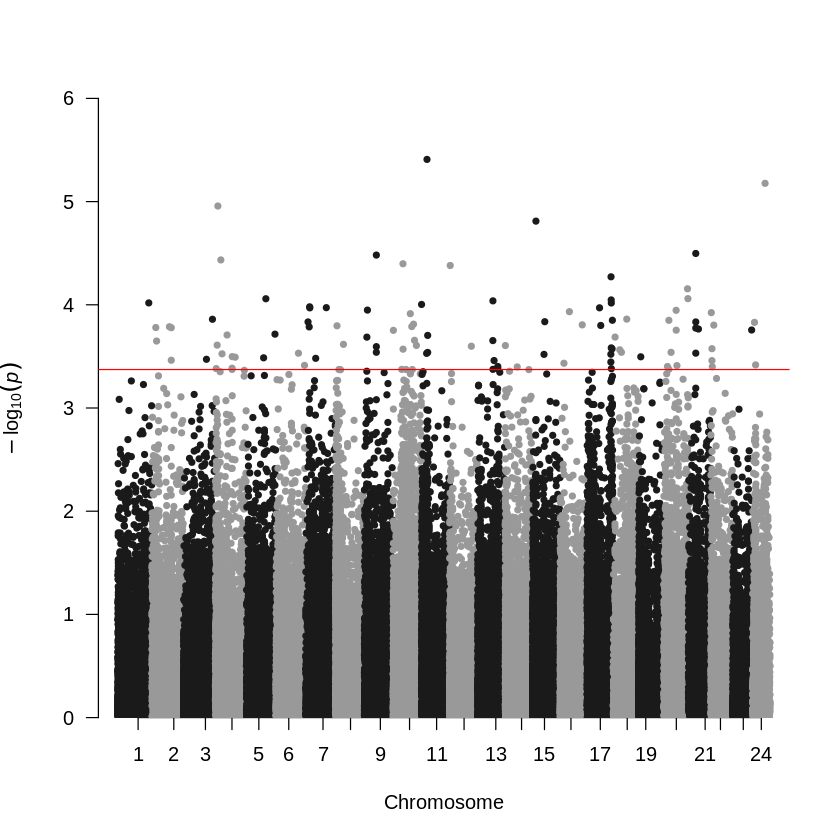

In [178]:
gw_sl <- quantile(sl_null_lowest$null_min_pvalue, .025)[[1]]
#gw_sl_null <- dchisq(min(sl_null_top$LRT), df=1)
#png("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/sl_manhattan_chrom_null_sig.025.png")
qqman::manhattan(lrt_filt_sl, chr="Chromosome_man", bp="Position", p="pvalue", genomewideline = -log10(gw_sl), suggestiveline = F)#, highlight =lrt_filt_sl[locus %in% sl_candidates[,locus] & pvalue <=gw_sl, SNP])
#dev.off()
#gw_sl

In [174]:
nrow(lrt_filt_sl[locus %in% sl_candidates[,locus] & pvalue <=gw_sl])
nrow(lrt_filt_ucrit[locus %in% ucrit_candidates[,locus] & pvalue <=gw_ucrit])

[1] 75

[1] 20

In [190]:
nrow(lrt_filt_sl[pvalue <=gw_sl])
nrow(lrt_filt_ucrit[pvalue <=gw_ucrit])

[1] 106

[1] 29

In [177]:
106/nrow(lrt_filt_sl)*100
29/nrow(lrt_filt_ucrit)*100

[1] 0.1005893

[1] 0.02195207

In [195]:
fwrite(lrt_filt_ucrit[pvalue <=gw_ucrit,.(Chromosome=gsub("chr", "", Chromosome), start=Position-3000, end=Position+3000)], "/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/null_candidates_ucrit_loci3kbp_CBWay.bed", sep="\t", col.names = F)

In [77]:
ucrit_cand[,.(Chromosome=gsub("chr", "", Chromosome), start=Position-3000, end=Position+3000)]

Chromosome,start,end
13,34979957,34985957
24,6018620,6024620
5,37579791,37585791


In [212]:
fwrite(lrt_filt_sl[pvalue <=gw_sl,.(Chromosome=gsub("chr", "", Chromosome), start=Position-3000, end=Position+3000)], "/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/null_candidates_sl_loci3kbp_CBWay.bed", sep="\t", col.names = F)

__write out the candidate positions to find closest feature in percula genome and blast against ocellaris for gene names__

In [229]:
candidates_sl_bedops <- lrt_filt_sl[pvalue <=gw_sl,.( Chromosome, start=Position-50, end=Position+50)]#, range=paste0(start, end, sep="-"))]
candidates_ucrit_bedops <- lrt_filt_ucrit[pvalue <=gw_ucrit,.( Chromosome, start=Position-50, end=Position+50)]#, range=paste0(start, end, sep="-"))]
#fwrite(candidates_sl_bedops[,.(Chromosome, start, end)], "/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/candidates_sl_loci50bpCBWay.bed", sep="\t", col.names = F)
#fwrite(candidates_ucrit_bedops[,.(Chromosome, start, end)], "/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/candidates_ucrit_loci50bpCBWay.bed", sep="\t", col.names = F)

__read in and sort the blast results__

In [254]:
sl_oce <- fread("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/sl_AM623A1R016-Alignment-HitTable3kbp.csv")
sl_oce_best <- unique(sl_oce[, .(seqid=V1, accession=V2, per_id=V3, evalue=V11)][, .SD[which.min(evalue)], by=seqid][ ,.(seqid, accession, per_id, evalue)], by="seqid")
(sl_oce_best)
#fwrite(sl_oce_best, "/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/sl_oce_best_3kbp.csv")

seqid,accession,per_id,evalue
1:41913981-41919980,XM_035954527.1,99.002,0.00e+00
3:39251515-39257514,XR_004846937.1,87.500,2.11e-69
6:38636343-38642342,XR_004848677.1,79.221,4.67e-08
9:16332703-16338702,XM_023298976.2,81.250,5.69e-07
9:16332705-16338704,XM_023298976.2,81.250,5.69e-07
10:17525079-17531078,BK059178.1,74.634,7.39e-31
10:27787495-27793494,XM_023281479.2,94.444,1.03e-22
10:31737937-31743936,BK059178.1,88.889,0.00e+00
11:421271-427270,BK059178.1,78.788,1.25e-21
11:7308633-7314632,XM_035948622.1,75.714,1.00e-03


seqid,accession,per_id
1:41914981-41918980,XM_035954527.1,100.000
3:39252515-39256514,XR_004846937.1,87.805
9:16333703-16337702,XM_023298976.2,81.250
9:16333705-16337704,XM_023298976.2,81.250
10:31738937-31742936,BK059178.1,91.176
11:422271-426270,XM_023298976.2,75.385
12:991810-995809,XR_004848677.1,100.000
15:4385765-4389764,XM_035948622.1,84.091
16:12558569-12562568,XM_023293331.2,75.817
17:34108490-34112489,BK059178.1,92.308


In [228]:
ucrit_oce <- fread("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/ucrit_AM5T11GH013-Alignment-HitTable3kbp.csv")
ucrit_oce_best <- unique(ucrit_oce[, .(seqid=V1, accession=V2, per_id=V3, evalue=V11)][, .SD[which.min(evalue)], by=seqid][ ,.(seqid, accession, per_id, evalue)], by="seqid")
ucrit_oce_best
#fwrite(ucrit_oce_best, "/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/ucrit_oce_best_3kbp.csv")

seqid,accession,per_id,evalue
3:37471581-37477580,XR_004848612.1,98.856,0.00e+00
4:26866659-26872658,XR_004846501.1,86.555,6.07e-32
5:37579792-37585791,XR_004846501.1,85.714,3.15e-29
14:11393159-11399158,XM_023264780.2,86.842,1.30e-02
14:35621215-35627214,XM_023277730.2,83.077,1.63e-07
21:26338057-26344056,XM_035955368.1,81.250,1.63e-07
24:3609439-3615438,XM_035944355.1,67.742,1.00e-03


In [221]:
unique(ucrit_oce[, .(seqid=V1, accession=V2, per_id=V3)][, .SD[which.max(per_id)], by=seqid][ ,.(seqid, accession, per_id)], by="seqid")

seqid,accession,per_id
3:37471581-37477580,XM_023290433.2,100.000
4:26866659-26872658,XR_004846501.1,86.555
5:37579792-37585791,XR_004846501.1,85.714
14:11393159-11399158,XM_023264780.2,86.842
14:35621215-35627214,XM_023277730.2,83.077
21:26338057-26344056,XM_035955368.1,81.250
24:3609439-3615438,XM_035944355.1,67.742


In [211]:
lrt_filt_ucrit[Chromosome=="chr3" & Position==37474580]

Chromosome,Position,Major,Minor,Frequency,N,LRT,high_WT/HE/HO,LRTem,beta,SE,emIter,locus,pvalue,SNP
chr3,37474580,G,A,0.251009,159,13.64509,10/10/0,17.62866,3.52236,0.55208,40,3:37474580,0.000220818,r15725


__read in the results for the nearest gene and join with blast results__

In [288]:
gff_names <- c("seqid", "start","locus", "feature_start", "feature_end", "feature_id", "score", "strand", "unkn", "feature_type", "phase", "attributes")
sl_nearest <- fread("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/sl_results_candidates_50bp_percula_nearestCBWay.bed", sep="\t", fill = T)
setnames(sl_nearest, gff_names)

#split the attributs column to get the gene name and the go terms
sl_split <- sl_nearest[, c('gene_id', 'protein_family', 'go_term_dist'):= tstrsplit(attributes, ";")][, c('go_term', 'dist_bp'):= tstrsplit(go_term_dist, "|", fixed=T),by="gene_id"]#[dist_bp ==0]
sl_split[, gene_id:=gsub("ID=", "", gene_id)][, go_term:=gsub("Ontology_term=", "", go_term)][, go_term:=gsub(",", " ", go_term)]
sl_split <- sl_split[, .(seqid, start, locus, feature_start, feature_end, gene_id, go_term, dist_bp)]

In [289]:
sl_oce_best[, c("Chromosome", "start_end"):= tstrsplit(seqid, ":")][,c("start", "end"):= tstrsplit(start_end, "-")][, start:=as.numeric(start)]
sl_split <- sl_split[, Chromosome:=gsub("chr", "", seqid)][, start:=as.numeric(start)]


In [290]:
str(sl_oce_best)
str(sl_split)

Classes ‘data.table’ and 'data.frame':	20 obs. of  8 variables:
 $ seqid     : chr  "1:41913981-41919980" "3:39251515-39257514" "6:38636343-38642342" "9:16332703-16338702" ...
 $ accession : chr  "XM_035954527.1" "XR_004846937.1" "XR_004848677.1" "XM_023298976.2" ...
 $ per_id    : num  99 87.5 79.2 81.2 81.2 ...
 $ evalue    : num  0.00 2.11e-69 4.67e-08 5.69e-07 5.69e-07 ...
 $ start_end : chr  "41913981-41919980" "39251515-39257514" "38636343-38642342" "16332703-16338702" ...
 $ Chromosome: chr  "1" "3" "6" "9" ...
 $ start     : num  41913981 39251515 38636343 16332703 16332705 ...
 $ end       : chr  "41919980" "39257514" "38642342" "16338702" ...
 - attr(*, ".internal.selfref")=<externalptr> 
Classes ‘data.table’ and 'data.frame':	106 obs. of  9 variables:
 $ seqid        : chr  "chr1" "chr10" "chr10" "chr10" ...
 $ start        : num  41916930 405963 11715326 13433633 13556814 ...
 $ locus        : chr  "41917030|chr1" "406063|chr10" "11715426|chr10" "13433733|chr10" ...
 $ feat

In [315]:
sl_blast_and_nearest <- sl_split[sl_oce_best, roll = "nearest", on = c("Chromosome", "start")][is.na(dist_bp), dist_bp:=0][, .(Chromosome=as.numeric(Chromosome), feature_start=start, feature_id=gene_id, go_term, dist_bp, A.ocellaris_acession=accession, evalue, per_id)]  

Warning message in `[.data.table`(sl_split[sl_oce_best, roll = "nearest", on = c("Chromosome", :
“Coerced double RHS to character to match the type of the target column (column 8 named 'dist_bp'). If the target column's type character is correct, it's best for efficiency to avoid the coercion and create the RHS as type character. To achieve that consider R's type postfix: typeof(0L) vs typeof(0), and typeof(NA) vs typeof(NA_integer_) vs typeof(NA_real_). You can wrap the RHS with as.character() to avoid this warning, but that will still perform the coercion. If the target column's type is not correct, it's best to revisit where the DT was created and fix the column type there; e.g., by using colClasses= in fread(). Otherwise, you can change the column type now by plonking a new column (of the desired type) over the top of it; e.g. DT[, `dist_bp`:=as.double(`dist_bp`)]. If the RHS of := has nrow(DT) elements then the assignment is called a column plonk and is the way to change a column'

In [316]:
str(sl_blast_and_nearest)
str(sl_candidates_gw)

Classes ‘data.table’ and 'data.frame':	20 obs. of  8 variables:
 $ Chromosome          : num  1 3 6 9 9 10 10 10 11 11 ...
 $ feature_start       : num  41913981 39251515 38636343 16332703 16332705 ...
 $ feature_id          : chr  "APERC1_00014912" "APERC1_00004930" "APERC1_00013860" "APERC1_00015496|0" ...
 $ go_term             : chr  "GO:0016579 GO:0036459" "GO:0005515" "GO:0003735 GO:0005622 GO:0005840 GO:0006412" NA ...
 $ dist_bp             : chr  "615" "0" "0" "0" ...
 $ A.ocellaris_acession: chr  "XM_035954527.1" "XR_004846937.1" "XR_004848677.1" "XM_023298976.2" ...
 $ evalue              : num  0.00 2.11e-69 4.67e-08 5.69e-07 5.69e-07 ...
 $ per_id              : num  99 87.5 79.2 81.2 81.2 ...
 - attr(*, ".internal.selfref")=<externalptr> 
Classes ‘data.table’ and 'data.frame':	106 obs. of  7 variables:
 $ Chromosome   : chr  "1" "2" "2" "2" ...
 $ Position     : int  41916980 5432894 6498469 23963023 26478697 26478699 31099594 39254514 1231219 2497234 ...
 $ Major        

In [333]:
sl_candidates_gw <- lrt_filt_sl[pvalue <=gw_sl][, .(Chromosome=as.numeric(Chromosome_man), Position, Major, Minor, Frequency, pvalue, feature_start=Position)]
#head(sl_candidates_gw)
sl_blast_and_nearest[sl_candidates_gw, roll = "nearest", on = .(Chromosome, feature_start)][dist_bp==0]

Chromosome,Position,Major,Minor,Frequency,pvalue,feature_start
1,41916980,A,G,0.227216,9.587917e-05,41916980
2,5432894,T,C,0.218975,1.660653e-04,5432894
2,6498469,G,A,0.257350,2.244927e-04,6498469
2,23963023,G,T,0.276655,1.631281e-04,23963023
2,26478697,T,C,0.110180,1.665821e-04,26478697
2,26478699,C,T,0.098595,3.445402e-04,26478699


Chromosome,feature_start,feature_id,go_term,dist_bp,A.ocellaris_acession,evalue,per_id,Position,Major,Minor,Frequency,pvalue
3,31099594,APERC1_00004930,GO:0005515,0,XR_004846937.1,2.11e-69,87.500,31099594,C,T,0.231289,3.372613e-04
3,39254514,APERC1_00004930,GO:0005515,0,XR_004846937.1,2.11e-69,87.500,39254514,C,T,0.220218,1.381006e-04
6,30410039,APERC1_00013860,GO:0003735 GO:0005622 GO:0005840 GO:0006412,0,XR_004848677.1,4.67e-08,79.221,30410039,A,G,0.215990,2.945069e-04
6,38639342,APERC1_00013860,GO:0003735 GO:0005622 GO:0005840 GO:0006412,0,XR_004848677.1,4.67e-08,79.221,38639342,G,A,0.085169,3.864197e-04
9,3431150,APERC1_00015496|0,NA,0,XM_023298976.2,5.69e-07,81.250,3431150,T,G,0.195586,2.058164e-04
9,4203954,APERC1_00015496|0,NA,0,XM_023298976.2,5.69e-07,81.250,4203954,A,C,0.140110,1.125133e-04
9,16330996,APERC1_00015496|0,NA,0,XM_023298976.2,5.69e-07,81.250,16330996,A,G,0.306607,2.883283e-04
9,16335702,APERC1_00015496|0,NA,0,XM_023298976.2,5.69e-07,81.250,16335702,C,T,0.190090,2.543800e-04
9,16335704,APERC1_00015496|0,NA,0,XM_023298976.2,5.69e-07,81.250,16335704,G,A,0.194742,3.297089e-05
10,31740936,APERC1_00008675,NA,0,BK059178.1,0.00e+00,88.889,31740936,C,T,0.238739,2.475011e-04


In [327]:
sl_candidates_gw[Chromosome==1 & Position==39251515+50]

Chromosome,Position,Major,Minor,Frequency,pvalue,feature_start


In [323]:
head(sl_blast_and_nearest)

Chromosome,feature_start,feature_id,go_term,dist_bp,A.ocellaris_acession,evalue,per_id
1,41913981,APERC1_00014912,GO:0016579 GO:0036459,615,XM_035954527.1,0.00e+00,99.002
3,39251515,APERC1_00004930,GO:0005515,0,XR_004846937.1,2.11e-69,87.500
6,38636343,APERC1_00013860,GO:0003735 GO:0005622 GO:0005840 GO:0006412,0,XR_004848677.1,4.67e-08,79.221
9,16332703,APERC1_00015496|0,NA,0,XM_023298976.2,5.69e-07,81.250
9,16332705,APERC1_00015496|0,NA,0,XM_023298976.2,5.69e-07,81.250
10,17525079,APERC1_00008079,GO:0004672 GO:0005524 GO:0006468,-1153,BK059178.1,7.39e-31,74.634


## Look for enriched go terms with topgo

In [93]:
all_sl_bedops <- lrt_filt_sl[,.(locus, Chromosome, start=Position-50, end=Position+50)][Chromosome %like% "chr"]#[,Chromosome := paste0("chr", Chromosome, sep="")]#, range=paste0(start, end, sep="-"))]
all_ucrit_bedops <- lrt_filt_ucrit[,.(locus, Chromosome, start=Position-50, end=Position+50)][Chromosome %like% "chr"]#[,Chromosome := paste0("chr", Chromosome, sep="")]#, range=paste0(start, end, sep="-"))]
#fwrite(all_sl_bedops[,.(Chromosome, start, end)], "/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/all_sl_loci50bp.bed", sep="\t", col.names = F)
#fwrite(all_ucrit_bedops[,.(Chromosome, start, end)], "/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/all_ucrit_loci50bp.bed", sep="\t", col.names = F)#

In [73]:
head(lrt_filt_sl[order(pvalue)])

Chromosome,Position,Major,Minor,Frequency,N,LRT,high_WT/HE/HO,LRTem,beta,SE,emIter,locus,pvalue,SNP
chr11,7825612,T,G,0.206307,147,21.31278,24/11/0,NaN,NaN,-9,1,11:7825612,3.901212e-06,r50869
chr24,16962690,T,G,0.258409,147,20.29089,10/13/0,NaN,NaN,-9,1,24:16962690,6.651661e-06,r104351
chr4,3491306,A,G,0.234541,147,19.32321,34/23/0,NaN,NaN,-9,1,4:3491306,1.103568e-05,r14897
chr15,4387764,C,T,0.264829,147,18.68006,25/26/1,NaN,NaN,-9,1,15:4387764,1.545908e-05,r68417
chr21,10182978,G,A,0.275357,147,17.30666,33/31/3,NaN,NaN,-9,1,21:10182978,3.180698e-05,r93760
chr9,16335704,G,A,0.194742,147,17.23837,22/12/0,NaN,NaN,-9,1,9:16335704,3.297089e-05,r40181


In [95]:
#load in the gff file from closest-feature
gff_names <- c("seqid", "start","locus", "feature_start", "feature_end", "feature_id", "score", "strand", "unkn", "feature_type", "phase", "attributes")
sl_nearest <- fread("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/sorted_all_sl_50bp_percula_nearest.bed", sep="\t", fill = T)
setnames(sl_nearest, gff_names)

#split the attributs column to get the gene name and the go terms
split <- sl_nearest[, c('gene_id', 'protein_family', 'go_term_dist'):= tstrsplit(attributes, ";")][, c('go_term', 'dist_bp'):= tstrsplit(go_term_dist, "|", fixed=T),by="gene_id"][dist_bp ==0]

go_sl <- split[!is.na(gene_id), .(gene_id=gsub("ID=", "", gene_id), go_term=gsub("Ontology_term=", "", go_term))][, go_term:=gsub(",", " ", go_term)][!is.na(go_term)]
go_sl <- unique(go_sl, by="gene_id")
go_terms <- by(go_sl, go_sl$gene_id,function(x) setNames(x$go_term,x$name))

go_sl <- split[!is.na(gene_id), .(gene_id=gsub("ID=", "", gene_id), go_term=gsub("Ontology_term=", "", go_term))][, go_term:=gsub(",", " ", go_term)][!is.na(go_term)]
go_sl_vec <- go_sl[, setNames(go_term, gene_id)]

               #sl_cand[, locus := paste(Chromosome, Position, sep=":")][,locus := gsub("chr", "", locus)]
           
          
sl_locus_lrt <- left_join(all_sl_bedops, lrt_filt_sl)[, sig:=ifelse(locus %in% sl_candidates$locus, 1, 0)][, .(Chromosome, start, end, sig)]
genes_score <- left_join(sl_locus_lrt, split[, .(seqid, start, feature_id)], by="start")[, .(feature_id, sig)][!is.na(feature_id)]
genes_score <- unique(genes_score[order(-sig)], by="feature_id")
genes_score_vec <- genes_score[, setNames(sig, feature_id)]
               
#sig <- max(candidates_sl$pvalue)
#sig <- max(lrt_filt_sl_sig$pvalue)
GOdata <- new("topGOdata", description="go analysis of closest genes for a percula phenotype of sl", ontology="BP", allGenes=genes_score_vec, geneSel = function(sig) {sig == 1},  annotationFun=annFUN.gene2GO, gene2GO=go_sl_vec)  

test.stat <- new("classicCount", testStatistic = GOFisherTest, name = "Fisher test")
resultFisher <- getSigGroups(GOdata, test.stat)
##pValue.classic <- score(resultFisher)

#test.stat <- new("weightCount", testStatistic = GOFisherTest, name = "Fisher test", sigRatio = "ratio")
#resultWeight <- getSigGroups(GOdata, test.stat)

test.stat <- new("elimScore", testStatistic = GOKSTest, name = "KS test", cutOff = 0.01)
resultElim <- getSigGroups(GOdata, test.stat)

allRes <- GenTable(GOdata, classic = resultFisher, elim= resultElim)
               allRes

Joining, by = c("locus", "Chromosome")Warning message in `[.data.table`(left_join(all_sl_bedops, lrt_filt_sl), , `:=`(sig, :
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Building most specific GOs .....
	( 72 GO terms found. )

Build GO DAG topology ..........
	( 390 GO terms and 725 relations. )

Annotating nodes ...............
	( 225 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 60 nontrivial nodes
		 parameters: 
			 test stat

GO.ID,Term,Annotated,Significant,Expected,Rank in elim,classic,elim
GO:0016192,vesicle-mediated transport,3,2,0.20,377,0.012,0.98
GO:0006810,transport,24,4,1.60,286,0.061,0.78
GO:0006890,"retrograde vesicle-mediated transport, G...",1,1,0.07,388,0.067,1.00
GO:0007005,mitochondrion organization,1,1,0.07,380,0.067,1.00
GO:0008053,mitochondrial fusion,1,1,0.07,381,0.067,1.00
GO:0048193,Golgi vesicle transport,1,1,0.07,389,0.067,1.00
GO:0048284,organelle fusion,1,1,0.07,382,0.067,1.00
GO:0051234,establishment of localization,25,4,1.67,294,0.070,0.80
GO:0051179,localization,27,4,1.80,303,0.089,0.84
GO:0007154,cell communication,55,6,3.67,383,0.129,1.00


In [39]:
           
sl_locus_lrt <- left_join(all_sl_bedops, lrt_filt_sl)[, sig:=ifelse(locus %in% sl_cand$locus, 1, 0)][, .(Chromosome, start, end, sig)]
genes_score <- left_join(sl_locus_lrt, split[, .(seqid, start, feature_id)], by="start")[, .(feature_id, sig)][!is.na(feature_id)]
#genes_score <- unique(genes_score[order(-sig)], by="feature_id")
genes_score_vec <- genes_score[, setNames(sig, feature_id)]

[1] 10

In [97]:
nrow(ucrit_candidates)

[1] 791

## perform enrichment test on gene score distribution with topGo https://montilab.github.io/BS831/articles/docs/KS_Enrichment.html

In [162]:
#load in the gff file from closest-feature
gff_names <- c("seqid", "start","locus", "feature_start", "feature_end", "feature_id", "score", "strand", "unkn", "feature_type", "phase", "attributes")
ucrit_nearest <- fread("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/sorted_all_ucrit_50bp_percula_nearest.bed", sep="\t", fill = T)
setnames(ucrit_nearest, gff_names)

#split the attributs column to get the gene name and the go terms
split <- ucrit_nearest[, c('gene_id', 'protein_family', 'go_term_dist'):= tstrsplit(attributes, ";")][, c('go_term', 'dist_bp'):= tstrsplit(go_term_dist, "|", fixed=T),by="gene_id"][dist_bp <=5000]

go_ucrit <- split[!is.na(gene_id), .(gene_id=gsub("ID=", "", gene_id), go_term=gsub("Ontology_term=", "", go_term))][, go_term:=gsub(",", " ", go_term)][!is.na(go_term)]
go_ucrit <- unique(go_ucrit, by="gene_id")
go_terms <- by(go_ucrit, go_ucrit$gene_id,function(x) setNames(x$go_term,x$name))

go_ucrit <- split[!is.na(gene_id), .(gene_id=gsub("ID=", "", gene_id), go_term=gsub("Ontology_term=", "", go_term))][, go_term:=gsub(",", " ", go_term)][!is.na(go_term)]
go_ucrit_vec <- go_ucrit[, setNames(go_term, gene_id)]

               #ucrit_cand[, locus := paste(Chromosome, Position, sep=":")][,locus := gsub("chr", "", locus)]
           
ucrit_locus_lrt <- left_join(all_ucrit_bedops, lrt_filt_ucrit)[, sig:=ifelse(locus %in% ucrit_candidates_power.9$locus, 1, 0)][, .(Chromosome, start, end, sig)]#
genes_score <- left_join(ucrit_locus_lrt, split[, .(seqid, start, feature_id)], by="start")[, .(feature_id, sig)][!is.na(feature_id)]
#genes_score <- unique(genes_score[order(-sig)], by="feature_id")
genes_score_vec <- genes_score[, setNames(sig, feature_id)]
               
#sig <- max(candidates_ucrit$pvalue)
#sig <- max(lrt_filt_ucrit_sig$pvalue)
GOdata <- new("topGOdata", description="go analysis of closest genes for a percula phenotype of ucrit", ontology="BP", allGenes=genes_score_vec, geneSel = function(sig) {sig <= gw_ucrit}, annotationFun=annFUN.gene2GO, gene2GO=go_ucrit_vec, nodeSize=10)  

resultKS <- runTest(GOdata, algorithm="classic", statistic="ks")

resultCount_elim <- runTest(GOdata, algorithm="elim", statistic="fisher")
               

#allRes <- GenTable(GOdata, classic = pValue.classic, elim= resultElim, weight=resultWeight, orderBy="elim",ranksOf = "classic", topNodes = 40)
#allRes

Joining, by = c("locus", "Chromosome")
Building most specific GOs .....
	( 85 GO terms found. )

Build GO DAG topology ..........
	( 441 GO terms and 849 relations. )

Annotating nodes ...............
	( 328 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 91 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 score order: increasing

			 -- Elim Algorithm -- 

		 the algorithm is scoring 0 nontrivial nodes
		 parameters: 
			 test statistic: fisher
			 cutOff: 0.01
Warning message in getSigGroups(object, test.stat):
“No enrichment can pe performed - there are no feasible GO terms!”

In [161]:
allRes <- GenTable(GOdata, classic_KS=resultKS, orderBy="classic_KS", topNodes = 40) #,ranksOf = "elim_KS",
allRes
setDT(allRes)
#allRes[Significant >0]

GO.ID,Term,Annotated,Significant,Expected,classic_KS
GO:0008150,biological_process,328,0,0,< 1e-30
GO:0009987,cellular process,243,0,0,< 1e-30
GO:0050794,regulation of cellular process,144,0,0,2.0e-25
GO:0065007,biological regulation,152,0,0,3.8e-25
GO:0050789,regulation of biological process,147,0,0,6.4e-25
GO:0008152,metabolic process,123,0,0,1.3e-20
GO:0071704,organic substance metabolic process,99,0,0,1.5e-18
GO:0044238,primary metabolic process,97,0,0,7.6e-18
GO:0023052,signaling,85,0,0,3.7e-16
GO:0044237,cellular metabolic process,83,0,0,1.4e-14


In [157]:
gw_ucrit
nrow(ucrit_locus_lrt[sig <= gw_ucrit])

[1] 0.0004230086

[1] 29

In [59]:
genes_score <- left_join(ucrit_locus_lrt, split[, .(seqid, start, feature_id, go_term)], by="start")[, go_term:=gsub("Ontology_term=", "", go_term)][, Position := start+50]#[, .(feature_id, sig)][!is.na(feature_id)]


Warning message in `[.data.table`(left_join(ucrit_locus_lrt, split[, .(seqid, start, :
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”

In [61]:
head(genes_score[sig==1])

Chromosome,start,end,sig,seqid,feature_id,go_term,Position
chr5,37582741,37582841,1,chr5,APERC1_00007364,"GO:0000166,GO:0004812,GO:0005524,GO:0006418,GO:0016876,GO:0043039",37582791
chr13,34982907,34983007,1,NA,NA,NA,34982957
chr24,6021570,6021670,1,NA,NA,NA,6021620


In [49]:
head(genes_score)

Chromosome,start,end,sig,seqid,feature_id
chr1,9954,10054,0,chr1,APERC1_00013921
chr1,32266,32366,0,chr1,APERC1_00013921
chr1,32276,32376,0,chr1,APERC1_00013921
chr1,32300,32400,0,chr1,APERC1_00013921
chr1,32847,32947,0,chr1,APERC1_00013921
chr1,33169,33269,0,chr1,APERC1_00013921


__Pull out the significant features, write out the positions to blast zebra with seqk__

In [34]:
#test.stat <- new("classicScore", testStatistic = GOKSTest, name = "KS tests")
#resultKS <- getSigGroups(GOdata, test.stat)

test.stat <- new("classicCount", testStatistic = GOFisherTest, name = "Fisher test")
resultFisher <- getSigGroups(GOdata, test.stat)
#pValue.classic <- score(resultFisher)

#test.stat <- new("weightCount", testStatistic = GOFisherTest, name = "Fisher test", sigRatio = "ratio")
#resultWeight <- getSigGroups(GOdata, test.stat)

test.stat <- new("elimScore", testStatistic = GOKSTest, name = "Fisher test", cutOff = 0.01)
resultElim <- getSigGroups(GOdata, test.stat)

allRes <- GenTable(GOdata, classic = resultFisher, elim= resultElim)


			 -- Classic Algorithm -- 

		 the algorithm is scoring 10 nontrivial nodes
		 parameters: 
			 test statistic: Fisher test

			 -- Elim Algorithm -- 

		 the algorithm is scoring 424 nontrivial nodes
		 parameters: 
			 test statistic: Fisher test
			 cutOff: 0.01
			 score order: increasing

	 Level 13:	3 nodes to be scored	(0 eliminated genes)

	 Level 12:	7 nodes to be scored	(0 eliminated genes)

	 Level 11:	14 nodes to be scored	(0 eliminated genes)

	 Level 10:	25 nodes to be scored	(0 eliminated genes)

	 Level 9:	33 nodes to be scored	(0 eliminated genes)

	 Level 8:	38 nodes to be scored	(0 eliminated genes)

	 Level 7:	50 nodes to be scored	(0 eliminated genes)

	 Level 6:	65 nodes to be scored	(0 eliminated genes)

	 Level 5:	86 nodes to be scored	(0 eliminated genes)

	 Level 4:	57 nodes to be scored	(0 eliminated genes)

	 Level 3:	33 nodes to be scored	(0 eliminated genes)

	 Level 2:	12 nodes to be scored	(0 eliminated genes)

	 Level 1:	1 nodes to be scored	(0 elimi

In [41]:
(allRes)

GO.ID,Term,Annotated,Significant,Expected,Rank in elim,classic,elim
GO:0007154,cell communication,75,1,0.25,295,0.25,0.73
GO:0007165,signal transduction,75,1,0.25,296,0.25,0.73
GO:0051716,cellular response to stimulus,75,1,0.25,297,0.25,0.73
GO:0050896,response to stimulus,76,1,0.25,262,0.25,0.64
GO:0023052,signaling,79,1,0.26,333,0.26,0.83
GO:0050794,regulation of cellular process,135,1,0.45,218,0.45,0.50
GO:0050789,regulation of biological process,137,1,0.46,261,0.46,0.63
GO:0065007,biological regulation,141,1,0.47,215,0.47,0.48
GO:0009987,cellular process,224,1,0.75,300,0.75,0.73
GO:0008150,biological_process,300,1,1.00,424,1.00,1.00


In [35]:
allRes <- GenTable(GOdata,  elim = resultKS.elim, orderBy = "elim")

ERROR: Error in .local(object, ...): object 'resultKS.elim' not found


In [36]:
allRes

GO.ID,Term,Annotated,Significant,Expected,Rank in elim,classic,elim
GO:0007154,cell communication,75,1,0.25,295,0.25,0.73
GO:0007165,signal transduction,75,1,0.25,296,0.25,0.73
GO:0051716,cellular response to stimulus,75,1,0.25,297,0.25,0.73
GO:0050896,response to stimulus,76,1,0.25,262,0.25,0.64
GO:0023052,signaling,79,1,0.26,333,0.26,0.83
GO:0050794,regulation of cellular process,135,1,0.45,218,0.45,0.50
GO:0050789,regulation of biological process,137,1,0.46,261,0.46,0.63
GO:0065007,biological regulation,141,1,0.47,215,0.47,0.48
GO:0009987,cellular process,224,1,0.75,300,0.75,0.73
GO:0008150,biological_process,300,1,1.00,424,1.00,1.00


In [229]:
fwrite(allRes, "/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/GO_table_null_cutoff_sl.csv")

In [126]:
#fwrite(allRes, "/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/GO_table_BH_cutoff_sl.csv")

__make a table of genes and pvalues for results__

In [66]:
sl_gff_join <- split[, .(Chromosome=seqid, Position=start+50, gene_id=gsub("ID=", "", gene_id), go_term=gsub("Ontology_term=", "", go_term), dist_bp)]
sl_gene_join <- candidate_sl_bh[,.(Chromosome =paste0("chr", Chromosome, ""), Position, Frequency, pvalue, locus)]
sl_gene_ids <- (left_join(sl_gene_join, sl_gff_join))[!is.na(dist_bp)][, chrom_sig_0.05 := ifelse(locus %in% candidate_sl_chrom_bh$locus, "yes", "no")]
#fwrite(sl_gene_ids, "/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/genes_table_BH_cutoff_sl.csv")

Chromosome,Position,gene_id,go_term,dist_bp
chr1,10004,APERC1_00013921,GO:0005515,16508
chr1,32316,APERC1_00013921,GO:0005515,0
chr1,32326,APERC1_00013921,GO:0005515,0
chr1,32350,APERC1_00013921,GO:0005515,0
chr1,32897,APERC1_00013921,GO:0005515,0
chr1,33219,APERC1_00013921,GO:0005515,0


__for ucrit__

In [758]:
#load in the gff file from closest-feature
gff_names <- c("seqid", "start","locus", "feature_start", "feature_end", "feature_id", "score", "strand", "unkn", "feature_type", "phase", "attributes")
ucrit_nearest <- fread("/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/sorted_all_ucrit_50bp_percula_nearest.bed", sep="\t", fill = T)
setnames(ucrit_nearest, gff_names)

split <- ucrit_nearest[, c('gene_id', 'protein_family', 'go_term_dist'):= tstrsplit(attributes, ";")][, c('go_term', 'dist_bp'):= tstrsplit(go_term_dist, "|", fixed=T),by="gene_id"]

ucrit_locus_lrt <- left_join(all_ucrit_bedops, lrt_filt_ucrit[,Chromosome := paste0("chr", Chromosome, "")][pvalue>1, pvalue:=1])[, .(Chromosome, start, end, pvalue)]
genes_score <- left_join(ucrit_locus_lrt, split[, .(seqid, start, feature_id)], by="start")[, .(feature_id, pvalue)][!is.na(feature_id)]
genes_score <- unique(genes_score, by="feature_id")
genes_score_vec <- genes_score[, setNames(pvalue, feature_id)]

go_ucrit <- split[!is.na(gene_id), .(gene_id=gsub("ID=", "", gene_id), go_term=gsub("Ontology_term=", "", go_term))][, go_term:=gsub(",", " ", go_term)][!is.na(go_term)]
go_ucrit_vec <- go_ucrit[, setNames(go_term, gene_id)]

sig <- max(candidates_ucrit$pvalue)
#sig <- max(lrt_filt_ucrit_sig$pvalue)
GOdata <- new("topGOdata", description="go analysis of closest genes for a percula phenotype of ucrit", ontology="BP", allGenes=genes_score_vec, geneSel = function(foo) {foo < sig}, annotationFun=annFUN.gene2GO, gene2GO=go_ucrit_vec)

test.stat <- new("classicScore", testStatistic = GOKSTest, name = "KS tests")
resultKS <- getSigGroups(GOdata, test.stat)

test.stat <- new("classicCount", testStatistic = GOFisherTest, name = "Fisher test")
resultFisher <- getSigGroups(GOdata, test.stat)
pValue.classic <- score(resultFisher)

test.stat <- new("weightCount", testStatistic = GOFisherTest, name = "Fisher test", sigRatio = "ratio")
resultWeight <- getSigGroups(GOdata, test.stat)

test.stat <- new("elimScore", testStatistic = GOKSTest, name = "Fisher test", cutOff = 0.01)
resultElim <- getSigGroups(GOdata, test.stat)

allRes <- GenTable(GOdata, classic = resultFisher, elim= resultElim, orderBy = "classic", ranksOf = "classic", topNodes = 40)

Joining, by = c("locus", "Chromosome")
Building most specific GOs .....
	( 88 GO terms found. )

Build GO DAG topology ..........
	( 454 GO terms and 869 relations. )

Annotating nodes ...............
	( 335 genes annotated to the GO terms. )

			 -- Classic Algorithm -- 

		 the algorithm is scoring 454 nontrivial nodes
		 parameters: 
			 test statistic: KS tests
			 score order: increasing

			 -- Classic Algorithm -- 

		 the algorithm is scoring 0 nontrivial nodes
		 parameters: 
			 test statistic: Fisher test
Warning message in .local(object, test.stat, ...):
“No enrichment can pe performed - there are no feasible GO terms!”
			 -- Weight Algorithm -- 

		 The algorithm is scoring 0 nontrivial nodes
		 parameters: 
			 test statistic: Fisher test : ratio
Warning message in getSigGroups(GOdata, test.stat):
“No enrichment can pe performed - there are no feasible GO terms!”
			 -- Elim Algorithm -- 

		 the algorithm is scoring 454 nontrivial nodes
		 parameters: 
			 test statisti

In [768]:
ucrit_nearest[seqid=="chr24" & start==6021620-50]

seqid,start,locus,feature_start,feature_end,feature_id,score,strand,unkn,feature_type,phase,attributes,gene_id,protein_family,go_term_dist,go_term,dist_bp
chr24,6021570,6021670|chr24,6018402,6019755,APERC1_00025852,.,-,maker,gene,.,ID=APERC1_00025852|-1816,ID=APERC1_00025852|-1816,NA,NA,NA,NA


In [765]:
head(ucrit_nearest)

seqid,start,locus,feature_start,feature_end,feature_id,score,strand,unkn,feature_type,phase,attributes,gene_id,protein_family,go_term_dist,go_term,dist_bp
chr1,9954,10054|chr1,26561,55859,APERC1_00013921,.,-,maker,gene,.,"ID=APERC1_00013921;Dbxref=InterPro:IPR001073,InterPro:IPR011489,Pfam:PF00386,Pfam:PF07546;Ontology_term=GO:0005515|16508",ID=APERC1_00013921,"Dbxref=InterPro:IPR001073,InterPro:IPR011489,Pfam:PF00386,Pfam:PF07546",Ontology_term=GO:0005515|16508,Ontology_term=GO:0005515,16508
chr1,32266,32366|chr1,26561,55859,APERC1_00013921,.,-,maker,gene,.,"ID=APERC1_00013921;Dbxref=InterPro:IPR001073,InterPro:IPR011489,Pfam:PF00386,Pfam:PF07546;Ontology_term=GO:0005515|0",ID=APERC1_00013921,"Dbxref=InterPro:IPR001073,InterPro:IPR011489,Pfam:PF00386,Pfam:PF07546",Ontology_term=GO:0005515|0,Ontology_term=GO:0005515,0
chr1,32276,32376|chr1,26561,55859,APERC1_00013921,.,-,maker,gene,.,"ID=APERC1_00013921;Dbxref=InterPro:IPR001073,InterPro:IPR011489,Pfam:PF00386,Pfam:PF07546;Ontology_term=GO:0005515|0",ID=APERC1_00013921,"Dbxref=InterPro:IPR001073,InterPro:IPR011489,Pfam:PF00386,Pfam:PF07546",Ontology_term=GO:0005515|0,Ontology_term=GO:0005515,0
chr1,32300,32400|chr1,26561,55859,APERC1_00013921,.,-,maker,gene,.,"ID=APERC1_00013921;Dbxref=InterPro:IPR001073,InterPro:IPR011489,Pfam:PF00386,Pfam:PF07546;Ontology_term=GO:0005515|0",ID=APERC1_00013921,"Dbxref=InterPro:IPR001073,InterPro:IPR011489,Pfam:PF00386,Pfam:PF07546",Ontology_term=GO:0005515|0,Ontology_term=GO:0005515,0
chr1,32847,32947|chr1,26561,55859,APERC1_00013921,.,-,maker,gene,.,"ID=APERC1_00013921;Dbxref=InterPro:IPR001073,InterPro:IPR011489,Pfam:PF00386,Pfam:PF07546;Ontology_term=GO:0005515|0",ID=APERC1_00013921,"Dbxref=InterPro:IPR001073,InterPro:IPR011489,Pfam:PF00386,Pfam:PF07546",Ontology_term=GO:0005515|0,Ontology_term=GO:0005515,0
chr1,33169,33269|chr1,26561,55859,APERC1_00013921,.,-,maker,gene,.,"ID=APERC1_00013921;Dbxref=InterPro:IPR001073,InterPro:IPR011489,Pfam:PF00386,Pfam:PF07546;Ontology_term=GO:0005515|0",ID=APERC1_00013921,"Dbxref=InterPro:IPR001073,InterPro:IPR011489,Pfam:PF00386,Pfam:PF07546",Ontology_term=GO:0005515|0,Ontology_term=GO:0005515,0


In [762]:
candidates_ucrit

Chromosome,Position,pvalue,test,num_chrom,locus
chr24,6021620,1.088639e-05,chrom_bh,24,24:6021620
chr24,6021620,1.088639e-05,null.025,24,24:6021620


In [158]:
pValue.classic <- score(resultFisher)
allRes <- GenTable(GOdata, raw.p.value = resultFisher, KS = resultKS, weight = resultWeight, orderBy = "raw.p.value", ranksOf = "raw.p.value")

In [ ]:
raw.p.value = resultFisher,

In [159]:
allRes

GO.ID,Term,Annotated,Significant,Expected,raw.p.value,KS,weight
GO:2001141,regulation of RNA biosynthetic process,19,1,0.06,0.062,1.00,1.000
GO:0051171,regulation of nitrogen compound metaboli...,19,1,0.06,0.062,1.00,1.000
GO:2000112,regulation of cellular macromolecule bio...,19,1,0.06,0.062,1.00,1.000
GO:0006355,"regulation of transcription, DNA-templat...",19,1,0.06,0.062,0.37,0.062
GO:1903506,regulation of nucleic acid-templated tra...,19,1,0.06,0.062,1.00,1.000
GO:0010556,regulation of macromolecule biosynthetic...,19,1,0.06,0.062,1.00,1.000
GO:0031326,regulation of cellular biosynthetic proc...,19,1,0.06,0.062,1.00,1.000
GO:0019219,regulation of nucleobase-containing comp...,19,1,0.06,0.062,1.00,1.000
GO:0080090,regulation of primary metabolic process,19,1,0.06,0.062,1.00,1.000
GO:0051252,regulation of RNA metabolic process,19,1,0.06,0.062,1.00,1.000


In [134]:
fwrite(allRes, "/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/GO_table_null_cutoff_ucrit.csv")

__make a table of genes and pvalues for results__

In [97]:
ucrit_gff_join <- split[, .(Chromosome=seqid, Position=start+50, gene_id=gsub("ID=", "", gene_id), go_term=gsub("Ontology_term=", "", go_term), dist_bp)]
ucrit_gene_join <- candidates_ucrit[,.(Chromosome =paste0("chr", Chromosome, ""), Position, Frequency, pvalue, locus)]
ucrit_gene_ids <- (left_join(ucrit_gene_join, ucrit_gff_join))[!is.na(dist_bp)][, chrom_sig_0.05 := ifelse(locus %in% candidate_ucrit_chrom_bh$locus, "yes", "no")][order(pvalue)]
fwrite(ucrit_gene_ids, "/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/genes_table_BH_cutoff_ucrit.csv")

Joining, by = c("Chromosome", "Position")

In [367]:
candidates_ucrit[,prop_var_exp :=  (2*(beta^2)*Frequency*(1-Frequency))/(2*(beta^2)*Frequency*(1-Frequency)+((SE*(beta))^2)*2*N*Frequency*(1-Frequency)), by=locus]

In [372]:
head(candidates_ucrit[order(-prop_var_exp)])

Chromosome,Position,Major,Minor,Frequency,N,LRT,high_WT/HE/HO,LRTem,beta,SE,emIter,locus,pvalue,SNP,quantile,exp_lrt_ucrit,rank,padjBH,prop_var_exp
3,37551804,G,A,0.220549,159,11.981164,11/10/0,95.487181,5.624267,0.156675,21,3:37551804,0.0002883924,r15995,0.9998946,15.05037,15,0.000022584579,0.20395752
14,28287841,A,T,0.152335,159,13.690129,29/12/0,93.170741,5.620407,0.158527,37,14:28287841,0.0001147975,r81927,0.9999699,16.34551,5,0.000007528193,0.20016819
21,26341056,C,T,0.177783,159,12.641801,20/12/0,83.515645,-5.570075,0.168762,37,21:26341056,0.0002017778,r118772,0.9999172,15.53038,12,0.000018067663,0.18088359
16,810564,A,T,0.191451,159,10.378499,10/12/0,80.107630,-5.563156,0.171483,27,16:810564,0.0006905265,r90509,0.9997666,13.95036,32,0.000048180436,0.17619218
13,36077586,C,T,0.254284,159,7.470297,10/12/0,23.391575,-4.419535,0.377870,40,13:36077586,0.0034840690,r76273,0.9984116,10.05059,212,0.000319195387,0.04218887
10,28807129,A,G,0.412343,159,8.493882,24/45/10,8.684625,-1.206409,0.411977,5,10:28807129,0.0019585466,r59683,0.9990740,11.15528,124,0.000186699188,0.03573179


__Plot the ucrit distributions for each genotype of the significant locus__

In [235]:
genos <- fread("/data/katrinac/APPC_sequencing/Genome/candidates/ucrit_cand_genos.gprobs")
long_genos <- melt(genos, id.vars = c("V1", "V2", "V3"))
samples <- pca_phenos[, .(sample)][rep(seq_len(nrow(pca_phenos)), 3), ][order(sample)]
samples$genotype <- rep(seq(1, 3, 1), 159)
setnames(long_genos, c("marker", "allele1", "allele2", "sample", "gprob"))
long_genos$sample <- samples$sample
long_genos$geno <- samples$genotype

In [236]:
#restrict to grpob > .9
nrow(long_genos[gprob>=0.9])

[1] 46

In [239]:
#join with ucrit data
ucrit_genos <- left_join(long_genos[gprob>=0.9], pca_phenos[, .(sample, ucrit)])
#from angsd the major allele codes as 0=A, 1=C, 2=G, 3=T 
#the minor allele codes as 0=A, 1=C, 2=G, 3=T 
#row 1- grpob for major/major, row2 major/minor, row3 minor/minor
#for this locus major is T and minor is C.
ucrit_genos[, genotype:=ifelse(geno==1, "TT", ifelse(geno==2, "TC", "CC"))]

Joining, by = "sample"Warning message in `[.data.table`(ucrit_genos, , `:=`(genotype, ifelse(geno == 1, :
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”

In [240]:
#join with ucrit data
head(ucrit_genos)

marker,allele1,allele2,sample,gprob,geno,ucrit,genotype
24_6021620,3,1,Pop01_APPC1917,0.924959,1,1.20,TT
24_6021620,3,1,Pop02_APPC1006,0.999960,1,2.00,TT
24_6021620,3,1,Pop02_APPC1010,0.994955,1,6.22,TT
24_6021620,3,1,Pop02_APPC1015,0.995106,2,1.92,TC
24_6021620,3,1,Pop02_APPC3012,0.924959,1,1.75,TT
24_6021620,3,1,Pop04_APPC1308,0.995106,2,0.27,TC


In [244]:
ucrit_plot <- ggplot()+
geom_boxplot(data=ucrit_genos, aes(x=genotype, y=ucrit))+
 ylab("Ucrit") +
    xlab("Genotype")+
    theme(strip.text.x = element_text(size = 14),
    legend.position = "bottom",
    legend.key=element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), 
    panel.background = element_blank(), #,
    axis.line = element_line(colour = "black"),axis.text.x =  element_text(size=14, color="black"),#15 for publication, 20 for presentation #element_text(size=15, color="black", family="Helvetica"),
    axis.title.y =  element_text(size=18, color="black"),
    axis.title.x =  element_text(size=18, color="black"),#15 for publication, 20 for presentation #element_text(size=15, color="black", family="Helvetica"),
    axis.text.y =  element_text(size=18, color="black"))


Saving 6.67 x 6.67 in image


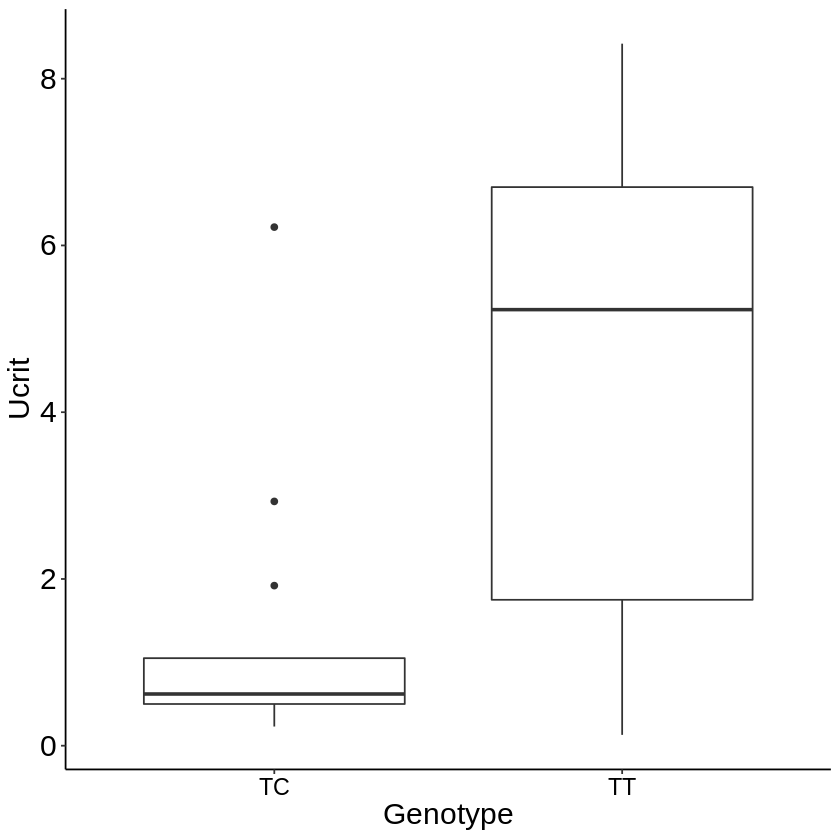

In [247]:
ucrit_plot
ggsave(ucrit_plot, file="/data/katrinac/APPC_sequencing/DNA/trimmed_reads/mapping/ensembl/genotypes/angsd/results/ucrit_genotypes.pdf")

In [196]:
tail(genos)

marker,allele1,allele2,Ind0,Ind0.1,Ind0.2,Ind1,Ind1.1,Ind1.2,Ind2,...,Ind155,Ind156,Ind156.1,Ind156.2,Ind157,Ind157.1,Ind157.2,Ind158,Ind158.1,Ind158.2
10_31930973,0,2,0.688254,0.282714,0.029033,0.688254,0.282714,0.029033,0.688254,...,0.029033,0.688254,0.282714,0.029033,0.688254,0.282714,0.029033,0.688254,0.282714,0.029033
10_31931015,1,2,0.739721,0.240699,0.019580,0.739721,0.240699,0.019580,0.739721,...,0.019580,0.739721,0.240699,0.019580,0.739721,0.240699,0.019580,0.739721,0.240699,0.019580
10_31931089,0,2,0.515885,0.404733,0.079382,0.515885,0.404733,0.079382,0.515885,...,0.079382,0.515885,0.404733,0.079382,0.718238,0.281740,0.000022,0.515885,0.404733,0.079382
10_31931309,1,0,0.299277,0.495570,0.205153,0.299277,0.495570,0.205153,0.299277,...,0.205153,0.299277,0.495570,0.205153,0.299277,0.495570,0.205153,0.299277,0.495570,0.205153
10_31931317,3,1,0.261782,0.499729,0.238490,0.261782,0.499729,0.238490,0.261782,...,0.238490,0.261782,0.499729,0.238490,0.261782,0.499729,0.238490,0.261782,0.499729,0.238490
10_31931339,2,0,0.338481,0.486620,0.174898,0.338481,0.486620,0.174898,0.338481,...,0.174898,0.338481,0.486620,0.174898,0.338481,0.486620,0.174898,0.338481,0.486620,0.174898


In [ ]:
Proportion of variance in phenotype explained by a given SNP (PVE) = [2*(beta^2)*MAF*(1-MAF)]/[2*(beta^2)*MAF(1-MAF)+((se(beta))^2)*2*N*MAF*(1-MAF)]
where:
N - sample size
se(beta) - standard error of effect size for the genetic variant of interest
beta - effect size for the genetic variant of interest
MAF - minor allele frequency for the genetic variant of interest
it is described in:
Shim, H., Chasman, D.I., Smith, J.D., Mora, S., Ridker, P.M., Nickerson, D.A., Krauss, R.M., and Stephens, M. (2015). A multivariate genome-wide association analysis of 10 LDL subfractions, and their response to statin treatment, in 1868 Caucasians. PLoS One 10, e0120758.
Supplementary Information: S1: Computing proportion of variance in phenotype explained by a given SNP (PVE).